# [ONLINE SHOPPERS PURCHASING INTENTION](https://www.kaggle.com/datasets/imakash3011/online-shoppers-purchasing-intention-dataset)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
from numpy import mean
from numpy import std

from sklearn.model_selection import train_test_split,GridSearchCV,RepeatedStratifiedKFold,cross_val_score
from sklearn.feature_selection import SelectKBest,chi2,f_classif
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,OneHotEncoder,StandardScaler,PowerTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score,accuracy_score
from scipy.stats import yeojohnson
from sklearn import preprocessing


import warnings
warnings.filterwarnings('ignore')

In [2]:
#from google.colab import files
#uploaded = files.upload()

### Load Dataset

In [3]:
df = pd.read_csv('online_shoppers_intention.csv')
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


## **Exploratory Data Analysis (EDA)**

### **Descriptive Statistics**

In [4]:
df.shape

(12330, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [6]:
df.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

*Tidak ada nilai kosong (non-null) dan nilai '0' bukan berarti nilai null*

#### **Dataset Description**
Dataset yang akan digunakan untuk pembuatan model ini memiliki 12330 entry dengan 18 feature. 9 feature merupakan data numerical dan 8 feature lainnya merupakan data categorical. Feature target (Revenue) termasuk data categorical. 

Numerical Features:
- Administrative: Number of pages visited by the user for user account management related activities.

- Administrative Duration: Time spent on Admin pages by the user.

- Informational: Number of pages visited by the user about the website

- Informational Duration: Time spent on Informational pages by the user

- Product Related: Number of product related pages visited by the user

- Product Related Duration: Time spent on Product related pages by the user.

- Bounce Rates: Average bounce rate of the pages visited by the user. It represents the percentage of visitors who enter the site and then leave rather than continuing to view other pages within the same site.

- Exit Rates: Average exit rate of the pages visited by the user. It is the percentage of people who left your site from that page.

- Page Values: Average page value of the pages visited by the user. It is the average value for a page that a user visited before landing on the goal page or completing an Ecommerce transaction (or both).


Categorical Features:

- Special Day: Closeness of the visiting day to a special event like Mother‟s Day or festivals like Christmas.

- Month: Visiting month during the whole year.

- Operating Systems: Operating Systems of the visitor.

- Browser: Browser of the visitor.

- Region: Geographic region from which the session has been started by the visitor.

- Traffic Type: Traffic source through which user has entered the website.

- Visitor Type: Defines the nature of user.

- Weekend: Defines the timing of the user.

- Revenue (target feature): Defines the visit has been finalized with a transaction.

In [7]:
nums = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration','ProductRelated','ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues']
cats1 = ['SpecialDay', 'OperatingSystems', 'Browser', 'Region', 'TrafficType']
cats2 = ['Month', 'VisitorType', 'Weekend', 'Revenue']

Berdasarkan tipe datanya, untuk feature-feature dalam dataset ini dibagi ke dalam beberapa kelompok:
1. nums: Numerical features yang memiliki data bertipe int64 dan float64
2. cats1: Categorical features yang memiliki data bertipe int64 dan float64
3. cats2: Categorical features yang memiliki data bertipe obj dan bool

**Follow up untuk pre-processing data kategorikal, cats1 harus dilakukan pengubahan tipe datanya menjadi obj** karena data kategorical tidak dapat memiliki tipe data int. maupun float. 
<p>Data kategorikal dari dataset ini hanya memiliki data yang sifatnya nominal, tidak ditemukan data kategorikal yang sifatnya ordinal.

In [8]:
continuous = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration','ProductRelated','ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues']
nominal = ['SpecialDay','Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType','VisitorType', 'Weekend', 'Revenue']

In [9]:
# Descriptive Statistic for Numerical Features [nums]
df[nums].describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,12330.0,2.315166,3.321784,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12330.0,80.818611,176.779107,0.0,0.000000,7.500000,93.256250,3398.750000
Informational,12330.0,0.503569,1.270156,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12330.0,34.472398,140.749294,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12330.0,31.731468,44.475503,0.0,7.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12330.0,1194.746220,1913.669288,0.0,184.137500,598.936905,1464.157214,63973.522230
BounceRates,12330.0,0.022191,0.048488,0.0,0.000000,0.003112,0.016813,0.200000
ExitRates,12330.0,0.043073,0.048597,0.0,0.014286,0.025156,0.050000,0.200000
PageValues,12330.0,5.889258,18.568437,0.0,0.000000,0.000000,0.000000,361.763742


In [10]:
df[cats1].describe().T

,count,mean,std,min,25%,50%,75%,max
SpecialDay,12330.0,0.061427,0.198917,0.0,0.0,0.0,0.0,1.0
OperatingSystems,12330.0,2.124006,0.911325,1.0,2.0,2.0,3.0,8.0
Browser,12330.0,2.357097,1.717277,1.0,2.0,2.0,2.0,13.0
Region,12330.0,3.147364,2.401591,1.0,1.0,3.0,4.0,9.0
TrafficType,12330.0,4.069586,4.025169,1.0,2.0,2.0,4.0,20.0


In [11]:
df[cats2].describe()

,Month,VisitorType,Weekend,Revenue
count,12330,12330,12330,12330
unique,10,3,2,2
top,May,Returning_Visitor,False,False
freq,3364,10551,9462,10422


Berdasarkan descriptive statistic dari data kategorikal cats2, terdapat nilai count, unique, top dan frequency yang memudahkan dalam melihat data kategorikal. Namun pada cats1 tidak dapat memunculkan nilai-nilai descriptive statistic yang selayaknya untuk data kategorikal karena tipe datanya yang masih berupa int dan float.

Pada cats2 dapat dilihat bahwa terdapat nilai Unique untuk masing-masing feature seperti unique month ada 10 bulan, VisitorType ada 3, Weekend ada 2 dan Revenue ada 2. Ada juga top yang menjelaskan mana nilai yang paling sering muncul, seperti pada month di tunjukan dengan bulan May, VisitorType dengan Returning_Visitor , Weekend dengan False, Revenue dengan False. Dan yang terakhir ada freq yang menjelaskan seberapa banyak data ini muncul. Pada Month frequensinya sebanyak 3364, VisitorType sebanyak 10551, Weekend sebanyak 9462 dan Revenue sebanyak 10422.

In [12]:
# print unique values untuk categorical features
for i in cats1 + cats2:
    if i in df.columns:
        unique_values = df[i].unique()
        unique_count = len(unique_values)
        print(f"Feature {i} memiliki {unique_count} unique values: {unique_values}")

Feature SpecialDay memiliki 6 unique values: [0.  0.4 0.8 1.  0.2 0.6]
Feature OperatingSystems memiliki 8 unique values: [1 2 4 3 7 6 8 5]
Feature Browser memiliki 13 unique values: [ 1  2  3  4  5  6  7 10  8  9 12 13 11]
Feature Region memiliki 9 unique values: [1 9 2 3 4 5 6 7 8]
Feature TrafficType memiliki 20 unique values: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 18 19 16 17 20]
Feature Month memiliki 10 unique values: ['Feb' 'Mar' 'May' 'Oct' 'June' 'Jul' 'Aug' 'Nov' 'Sep' 'Dec']
Feature VisitorType memiliki 3 unique values: ['Returning_Visitor' 'New_Visitor' 'Other']
Feature Weekend memiliki 2 unique values: [False  True]
Feature Revenue memiliki 2 unique values: [False  True]


### **Univariate Analysis**

#### **Numerical Features Univariate Analysis**

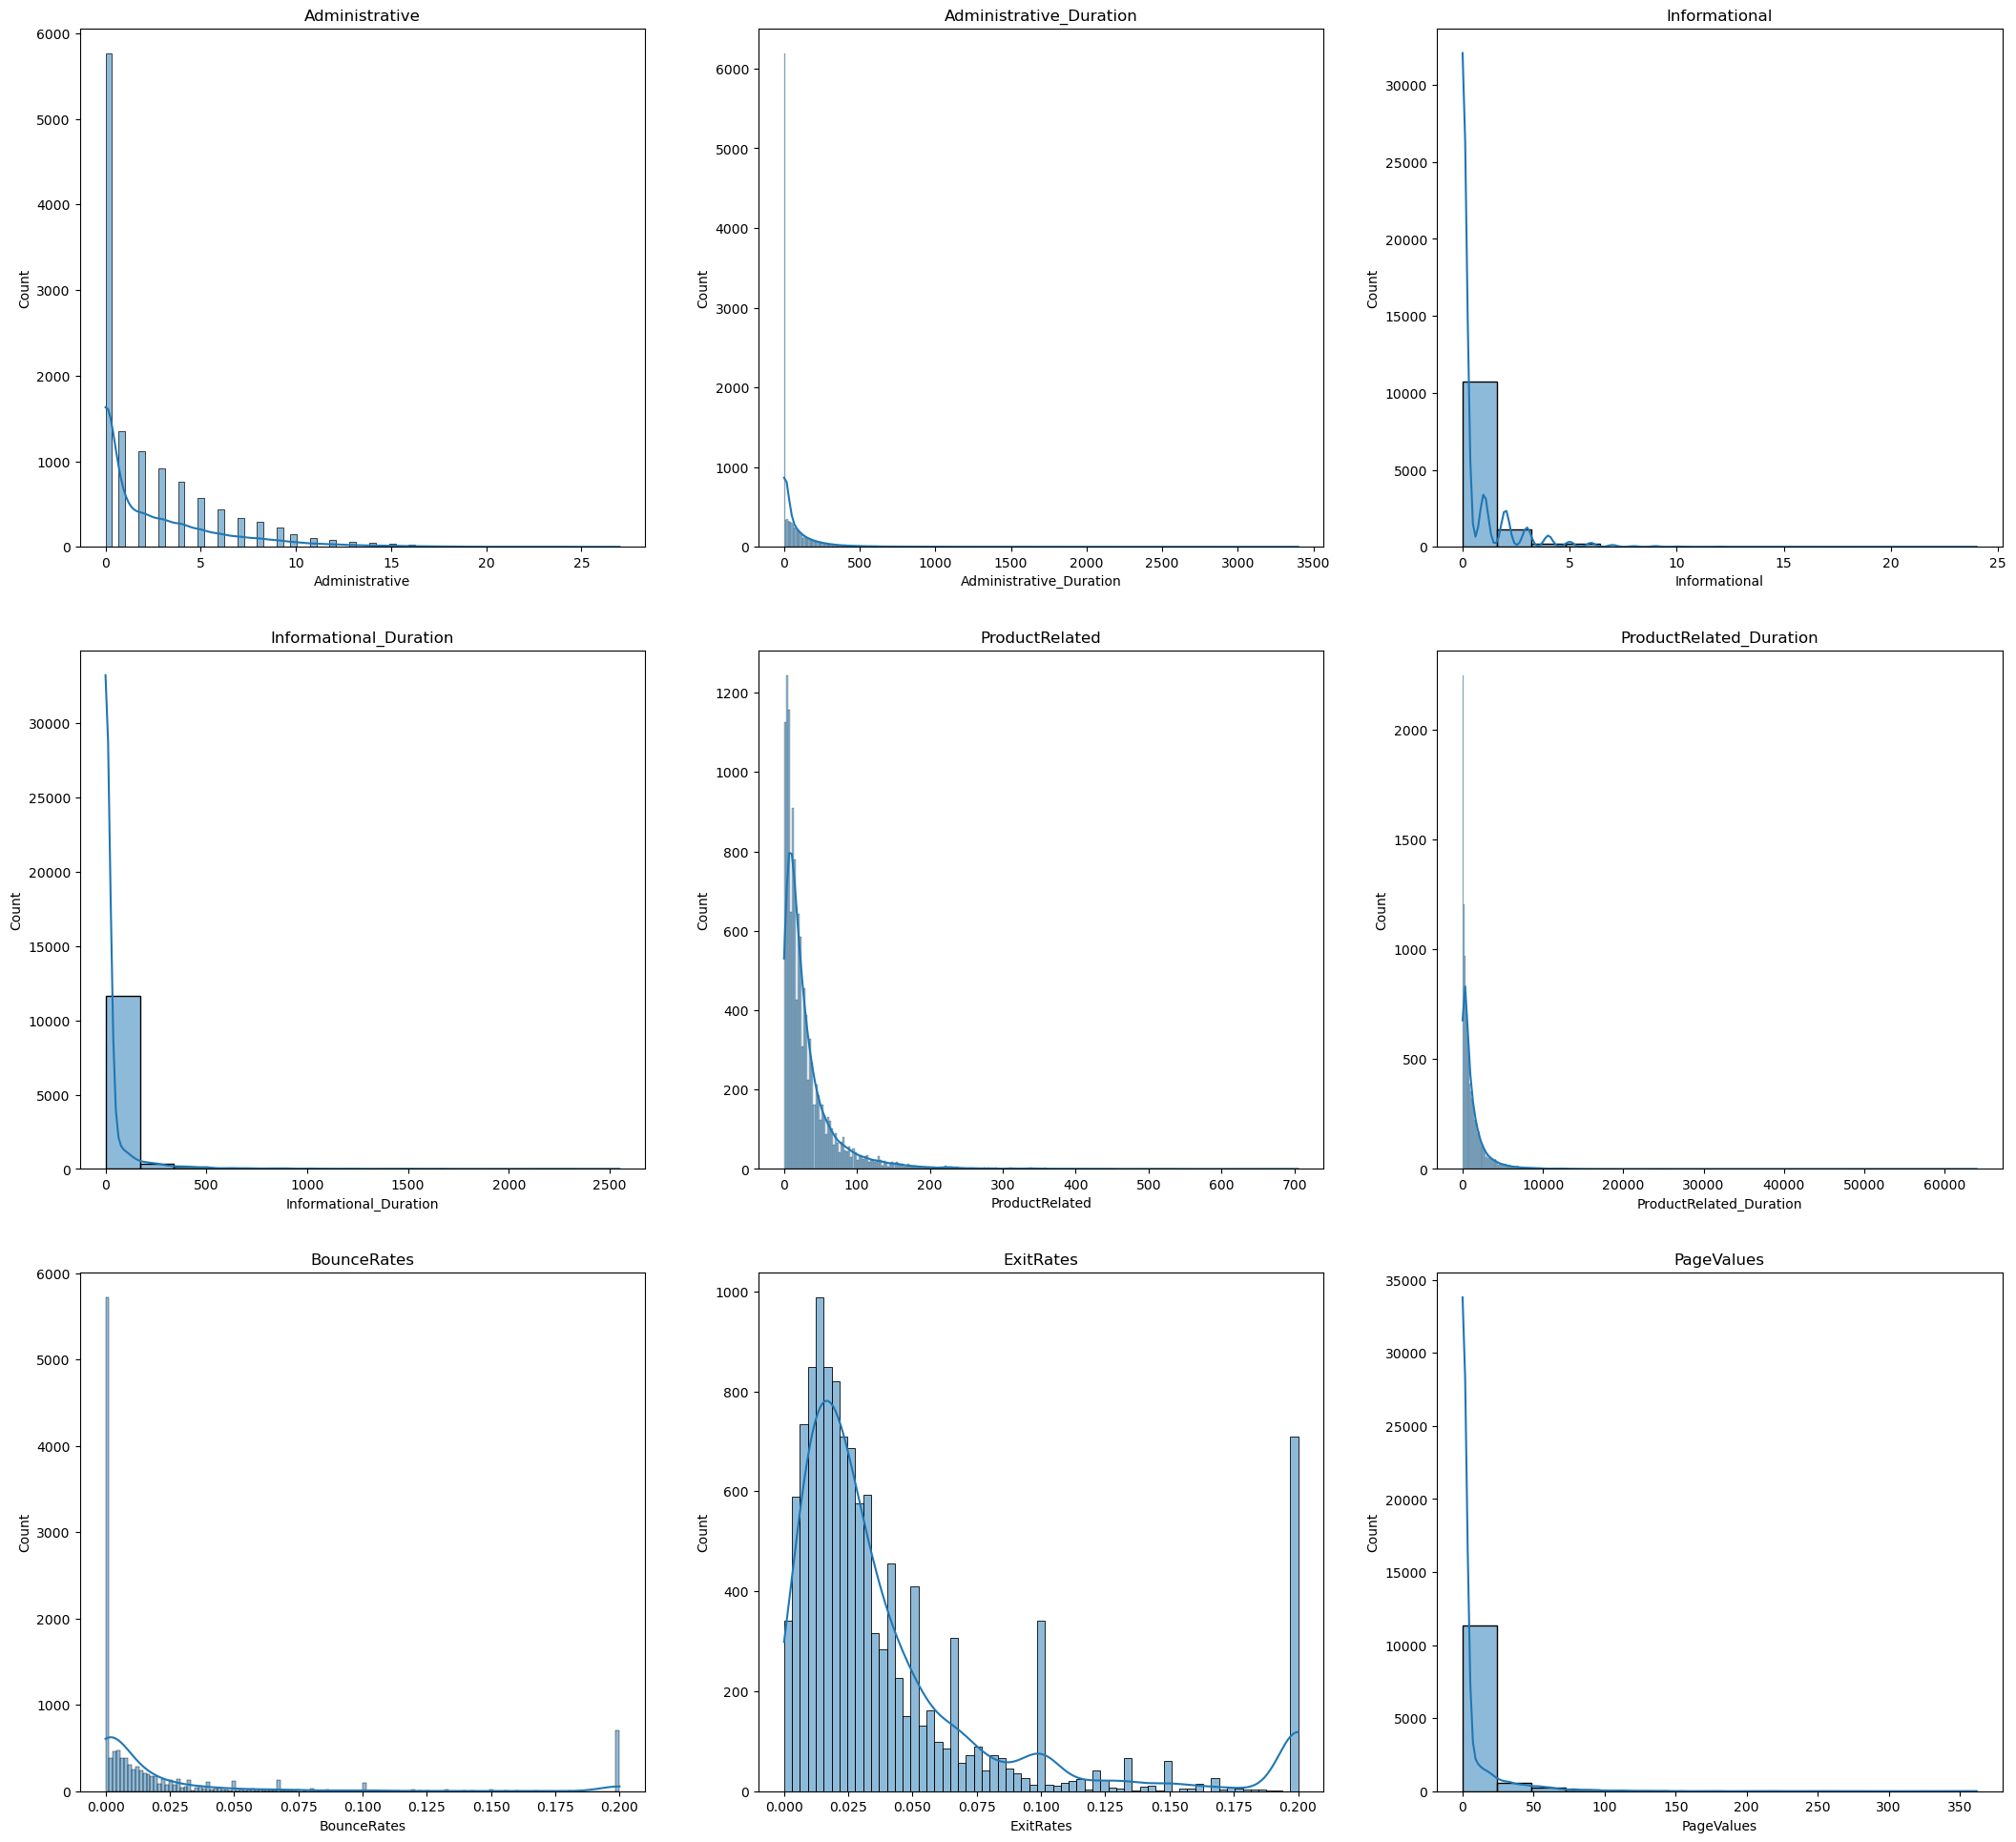

In [13]:
# Visualisasi histogram untuk melihat distribusi data numerical
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(26, 24), gridspec_kw={'hspace': 0.2, 'wspace': 0.2})
for variable, subplot in zip(nums, ax.flatten()):
    if variable in df.columns:
        sns.histplot(df[variable], ax=subplot, kde=True)
        subplot.set(title=variable)
    else:
        fig.delaxes(subplot)

plt.show()

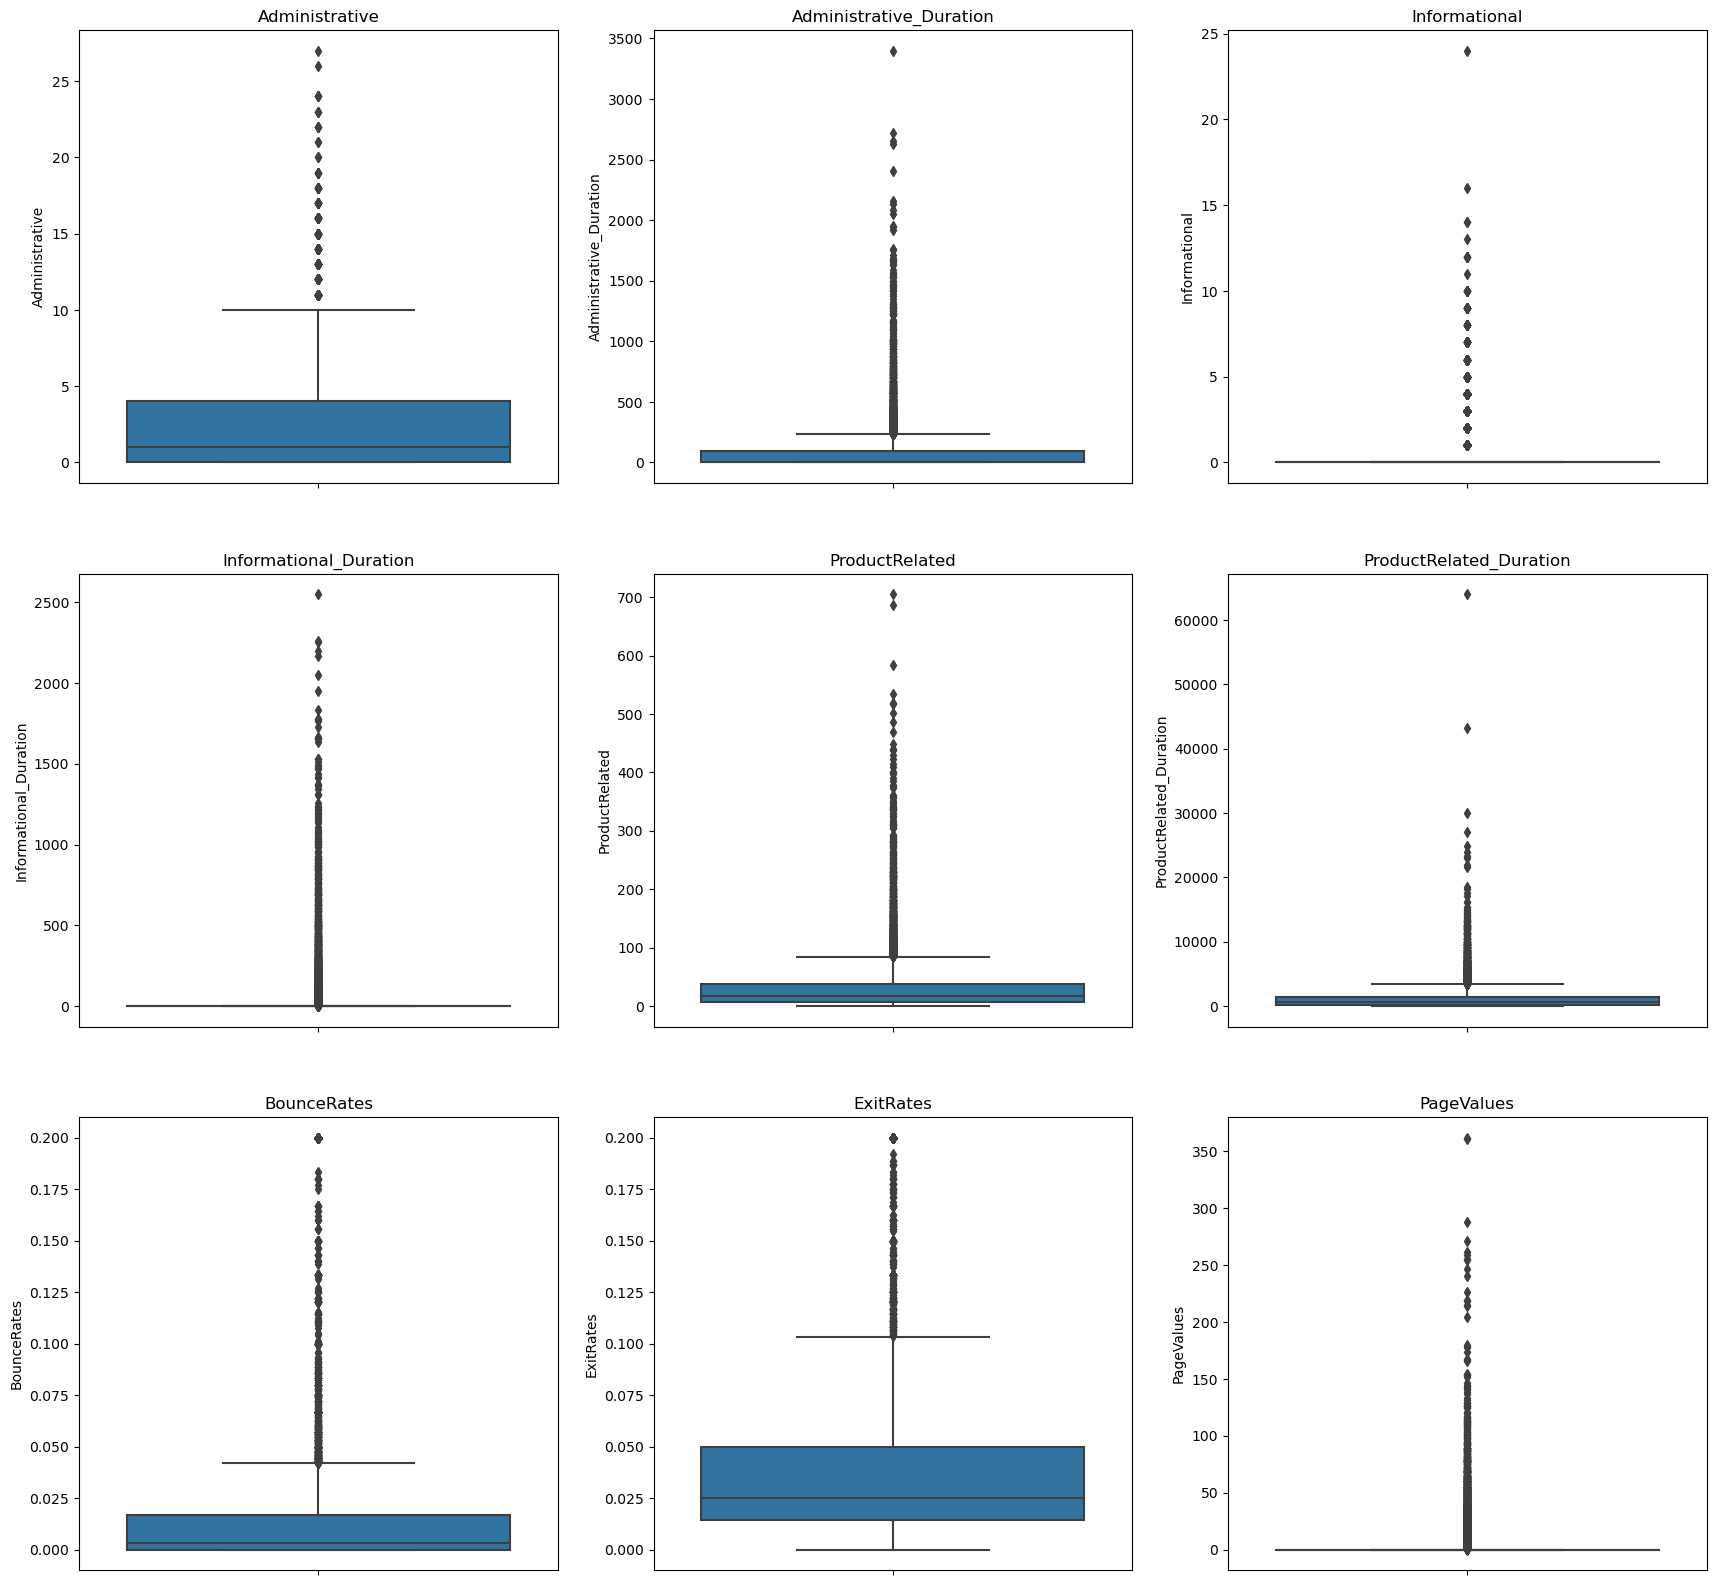

In [14]:
# Visualisasi boxplot untuk melihat outlier data numerical
fig2, ax2 = plt.subplots(nrows=3, ncols=3, figsize=(21, 20), gridspec_kw={'hspace': 0.2, 'wspace': 0.2})
for variable, subplot in zip(nums, ax2.flatten()):
    if variable in df.columns:
        sns.boxplot(y=df[variable], ax=subplot)
        subplot.set(title=variable)
    else:
        fig2.delaxes(subplot)

plt.show()

- Berdasarkan histplot diatas, numerical features memiliki distribusi yang skew positif (mean > median) dan tidak bimodal, selain itu jika dilihat dari boxplotnya semua numerical features memiliki outlier besar. 
- Untuk mengatasi data yang skew positif dan beroutlier, terdapat beberapa teknik yang dapat digunakan, antara lain: Transformasi Data, Menghapus Outlier,Menggunakan Metode Non-Parametrik, Menggunakan Model Machine Learning yang Tahan Outlier atau Menggunakan Metode Ensemble. Dari metode-metode tersebut nantinya akan dipilih mana yang paling baik untuk mengatasi outlier pada data yang dimiliki, dengan mengindetifikasi outlier lebih lanjut pada saat preprocessing.

**Interpretasi Univariate Plot untuk Numerical Features**
- Banyak user yang mengunjungi Administrative pages (account management) dilihat jumlah user yang berdistribusi tinggi pada number of pages 0, namun beberapa user juga ada yang mengunjungi beberapa halaman awal saja.
- Karena banyaknya user yang mengunjungi Administrative pages hanya beberapa halaman awal saja, user cenderung tidak banyak menghabiskan waktu pada Administrative pages dan distribusi durasi kunjungan terbanyak pada detik 0.
- Banyak user yang tidak mengunjungi Informational pages (information about shopping site), namun ada juga beberapa customer yang mengunjungi beberapa halaman awal saja.
- Karena banyaknya user yang tidak mengunjungi Informational pages atau hanya beberapa halaman awal saja yang dikunjungi, maka user tidak banyak menghabiskan waktu pada Informational pages dan distribusi durasi kunjungan terbanyak pada detik 0. 
- Banyak user yang mengunjungi Product Related pages setidaknya 1 halaman, namun ada juga beberapa user yang tidak mengunjungi atau bahkan mengunjungi Product Related pages sebanyak diatas 100 halaman.
- Banyak user mengunjungi Product Related pages dengan durasi kunjungan antara 0 sampai dengan 100 detik
- Bounce rates Dari grafik diatas dapat menunjukkan bahwa kebanyakan orang bahkan tidak mengunjungi, dan hanya sedikit orang mengunjungi dan pindah halaman
- Banyak pengunjung keluar dari halaman Exit rates berkisaran pada nilai 25-50 detik, namun ada juga yang mencapai 200 detik
- Page value rendah dikarenakan banyaknya user yang hanya mengunjungi sedikit pages (hanya di halaman awal) dan tidak melanjutkan ke halaman transaksi dari shopping site kita

##### **Categorical Features Univariate Analysis**

In [15]:
df['Month'] = pd.Categorical(df['Month'], categories=['Feb', 'Mar', 'May', 'June', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], ordered=True)
df = df.sort_values('Month')

Hal ini dilakukan bertujuan untuk mengurutkan data pada kolom 'Month' berdasarkan urutan bulan secara sistematis.


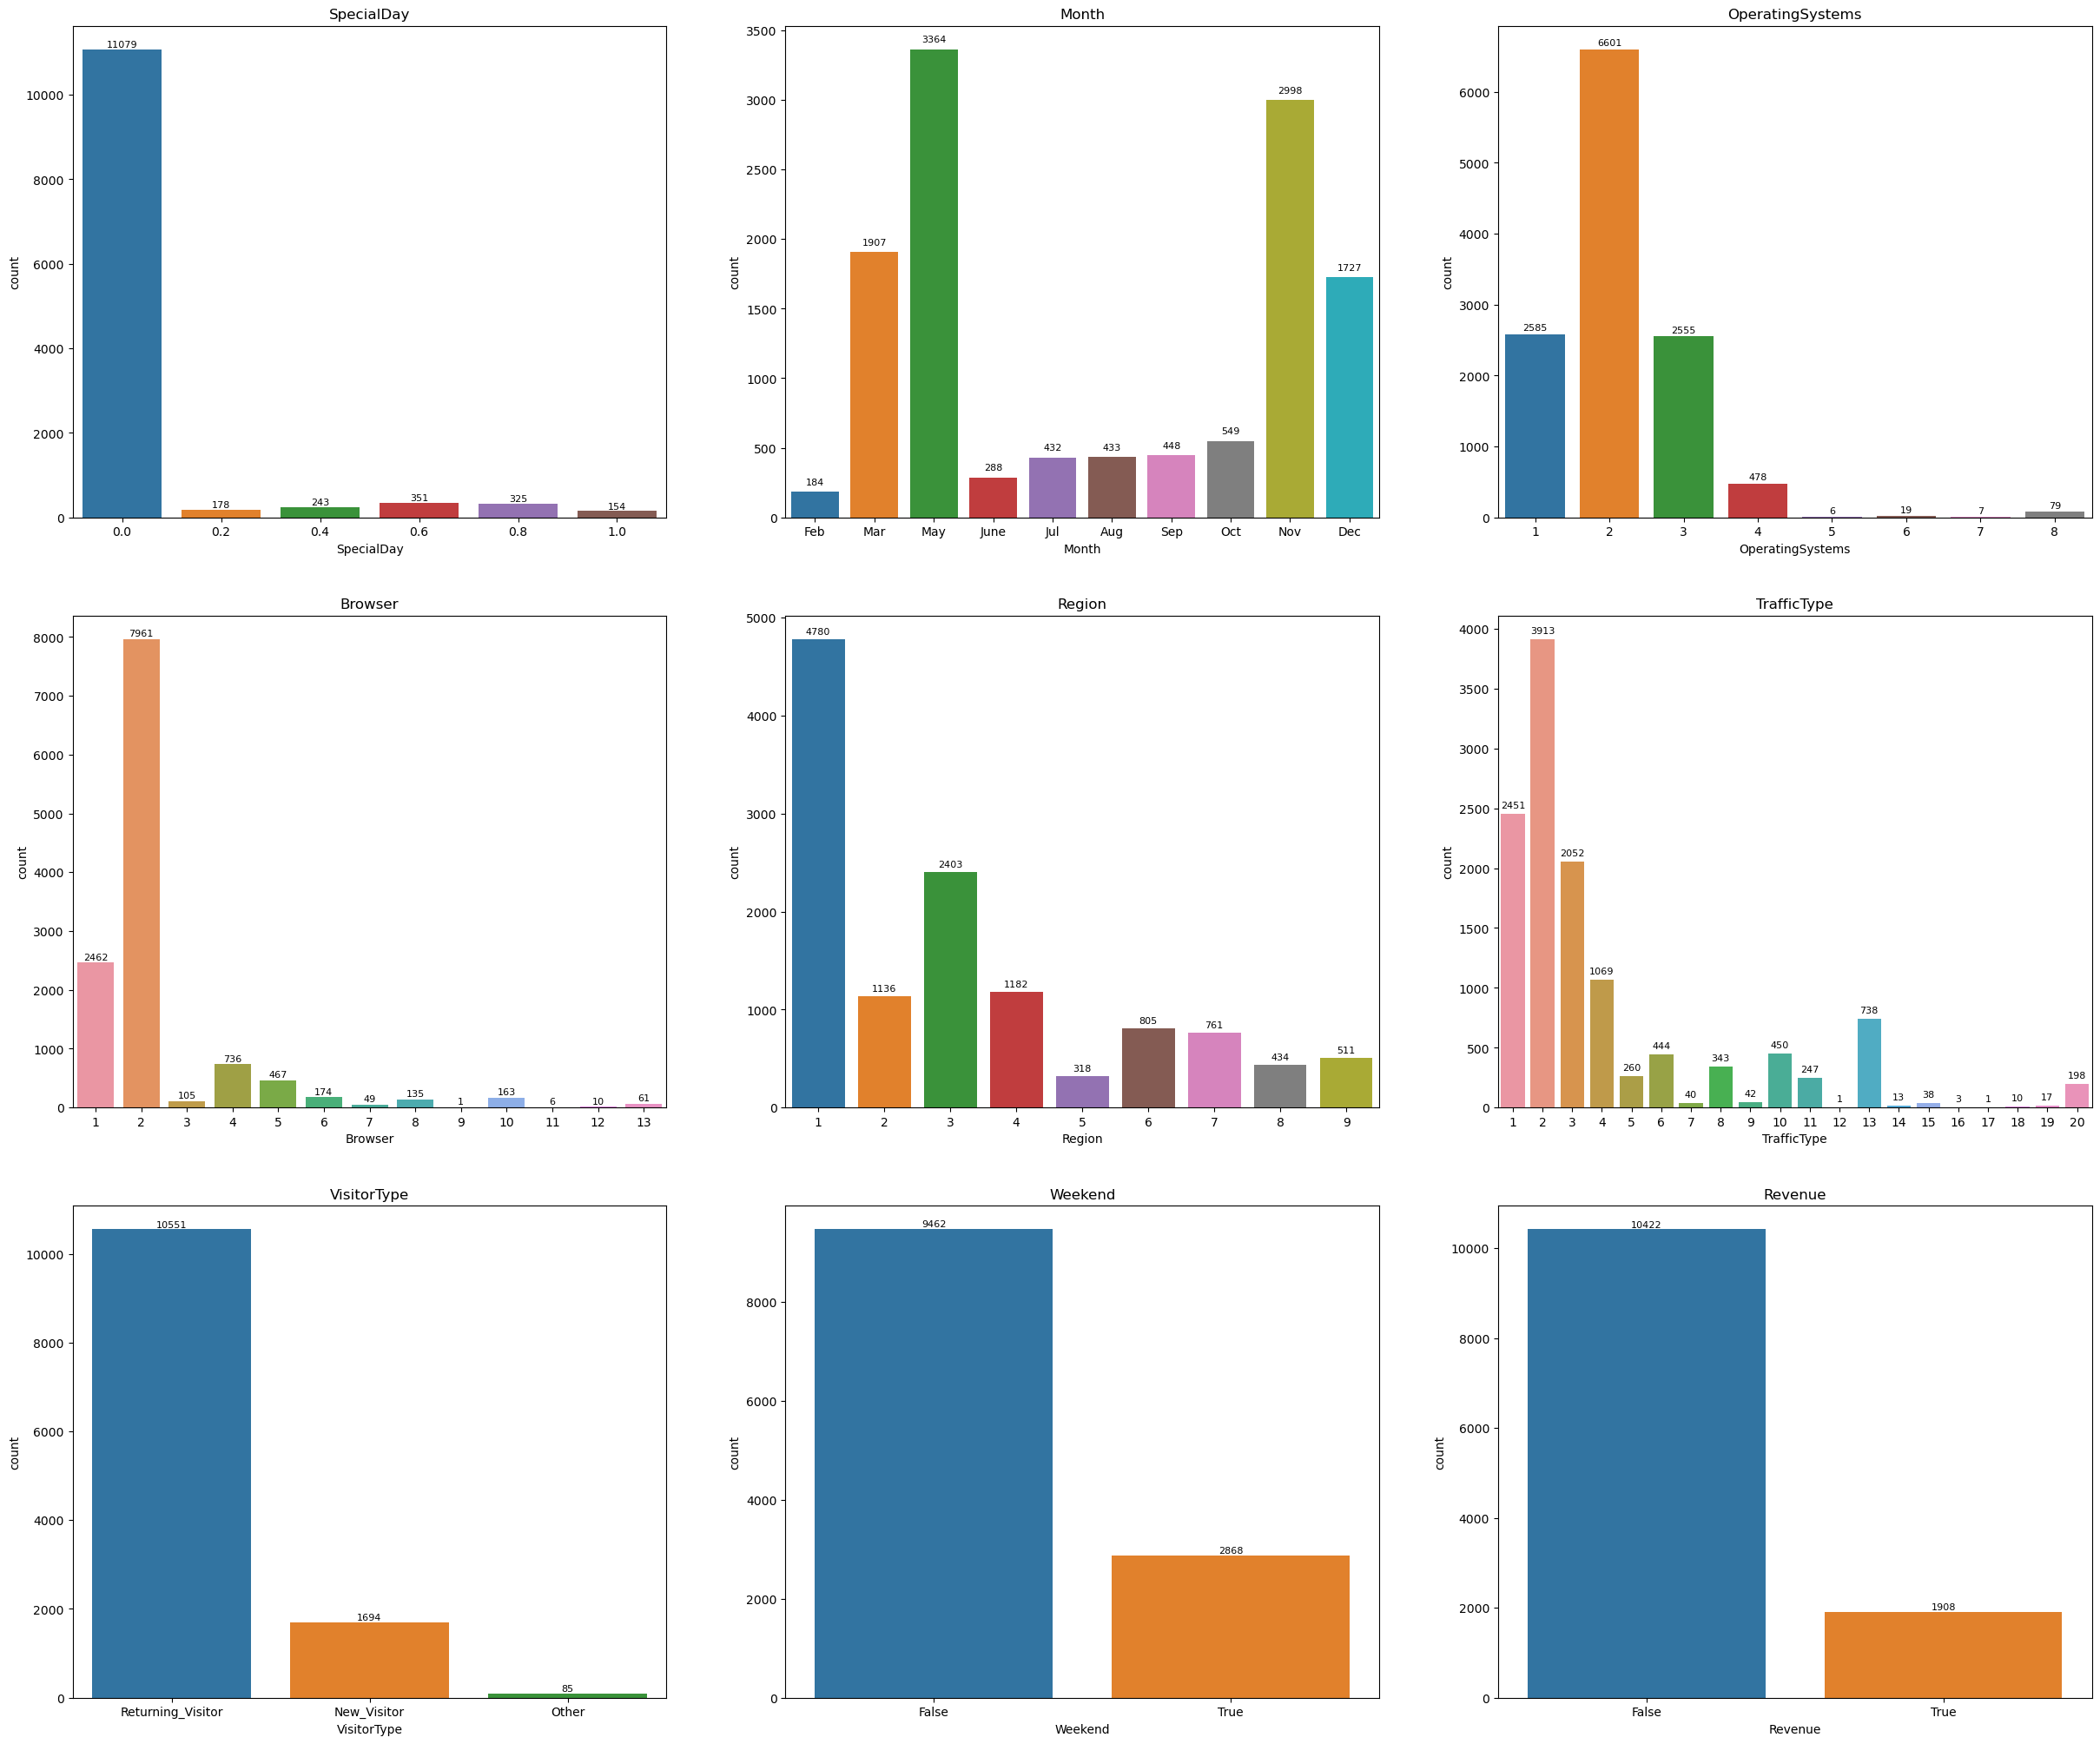

In [16]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(30, 25), gridspec_kw={'hspace': 0.2, 'wspace': 0.2})
for i, subplot in enumerate(ax.flatten()):
    variable = nominal[i]
    if variable in df.columns:
        sns.countplot(data=df, x=variable, ax=subplot, width=0.8)
        subplot.set(title=variable)

        # Menambahkan persentase untuk setiap kategori
        totals = float(len(df[variable]))
        for patch in subplot.patches:
            height = patch.get_height()
            #subplot.text(patch.get_x()+patch.get_width()/2., height+60, '{:.2f}%'.format((height/totals)*100), ha="center", fontsize=8) # Untuk menunjukan persen di atas bar
            subplot.text(patch.get_x()+patch.get_width()/2., height+50, '{:.0f}'.format(height), ha="center", fontsize=8) # Untuk menunjukan angka di atas bar
 
    else:
        fig.delaxes(subplot)

plt.show()

In [17]:
#persentase tiap nominal kategori
for col in nominal:
    print("Persentase Pengunjung pada feature",col,":")
    print((df[col].value_counts(normalize=True)*100).round(2))
    print("\n")

Persentase Pengunjung pada feature SpecialDay :
0.0    89.85
0.6     2.85
0.8     2.64
0.4     1.97
0.2     1.44
1.0     1.25
Name: SpecialDay, dtype: float64


Persentase Pengunjung pada feature Month :
May     27.28
Nov     24.31
Mar     15.47
Dec     14.01
Oct      4.45
Sep      3.63
Aug      3.51
Jul      3.50
June     2.34
Feb      1.49
Name: Month, dtype: float64


Persentase Pengunjung pada feature OperatingSystems :
2    53.54
1    20.97
3    20.72
4     3.88
8     0.64
6     0.15
7     0.06
5     0.05
Name: OperatingSystems, dtype: float64


Persentase Pengunjung pada feature Browser :
2     64.57
1     19.97
4      5.97
5      3.79
6      1.41
10     1.32
8      1.09
3      0.85
13     0.49
7      0.40
12     0.08
11     0.05
9      0.01
Name: Browser, dtype: float64


Persentase Pengunjung pada feature Region :
1    38.77
3    19.49
4     9.59
2     9.21
6     6.53
7     6.17
9     4.14
8     3.52
5     2.58
Name: Region, dtype: float64


Persentase Pengunjung pada feature T

**Interpretasi Univariate Countplot untuk Categorical Features**
- Sebanyak 89.9% user lebih dominan berkunjung di waktu yang tidak dekat dengan Special Day.
- Jumlah user terbanyak yang mengunjungi shopping site terdapat pada bulan Mei (27.28%), disusul dengan bulan November (24.32%) dan Maret (15.47%). Namun pada bulan Februari memiliki pengunjung yang rendah walaupun dalam bulan Februari terdapat special days (Valentine's day). Bulan Januari dan April tidak termasuk ke dalam dataset ini. **Untuk selanjutnya dalam perekaman dan perekapan data perlu dilakukan  secara lengkap setiap waktu atau bulannya agar hasil analisis dan model yang kita buat tepat dan terhindar dari kesalahan pengambilan keputusan.**
- OS 2 merupakan operating system yang lebih banyak digunakan oleh user dalam mengunjungi shopping site, disusul dengan OS 1 dan 3. 
- Browser 2 merupakan browser yang paling banyak digunakan oleh user dalam mengunjungi shopping site sebesar 64.57% user yang berkunjung, disusul dengan Browser 1 dan 4.
- Region 1 memiliki jumlah user yang paling banyak mengunjungi shopping site yaitu sebesar 38.77% user yang berkunjung, disusul dengan Region 3 dan 4.
- Traffic Type 2 merupakan sumber traffic yang paling banyak digunakan untuk user mengunjungi shopping site, sebanyak 31.74% user yang berkunjung, kemudian disusul dengan sumber traffic type 1 dan 3.
- Sebanyak 85.57% Returning visitor merupakan user yang paling banyak mengunjungi shopping site.
- Sebanyak 76.74% user melakukan transaksi pada di hari selain Weekend.
- Hanya 15.47% atau 1908 user yang berkunjung dan melakukakan transaksi. **Dikarena feature target (Revenue) memiliki persentase data 84.53% false dan hanya 15.47% yang true, sehingga dasatet ini dapat dikatakan sebagai imbalance data. Oleh karena itu perlu dilakukan metode Class Weight untuk mengatasinya.**

----------------------------------------------------------

### **Bivariate Analysis and Multivariate Analysis**

#### **Numerical Features vs Revenue**

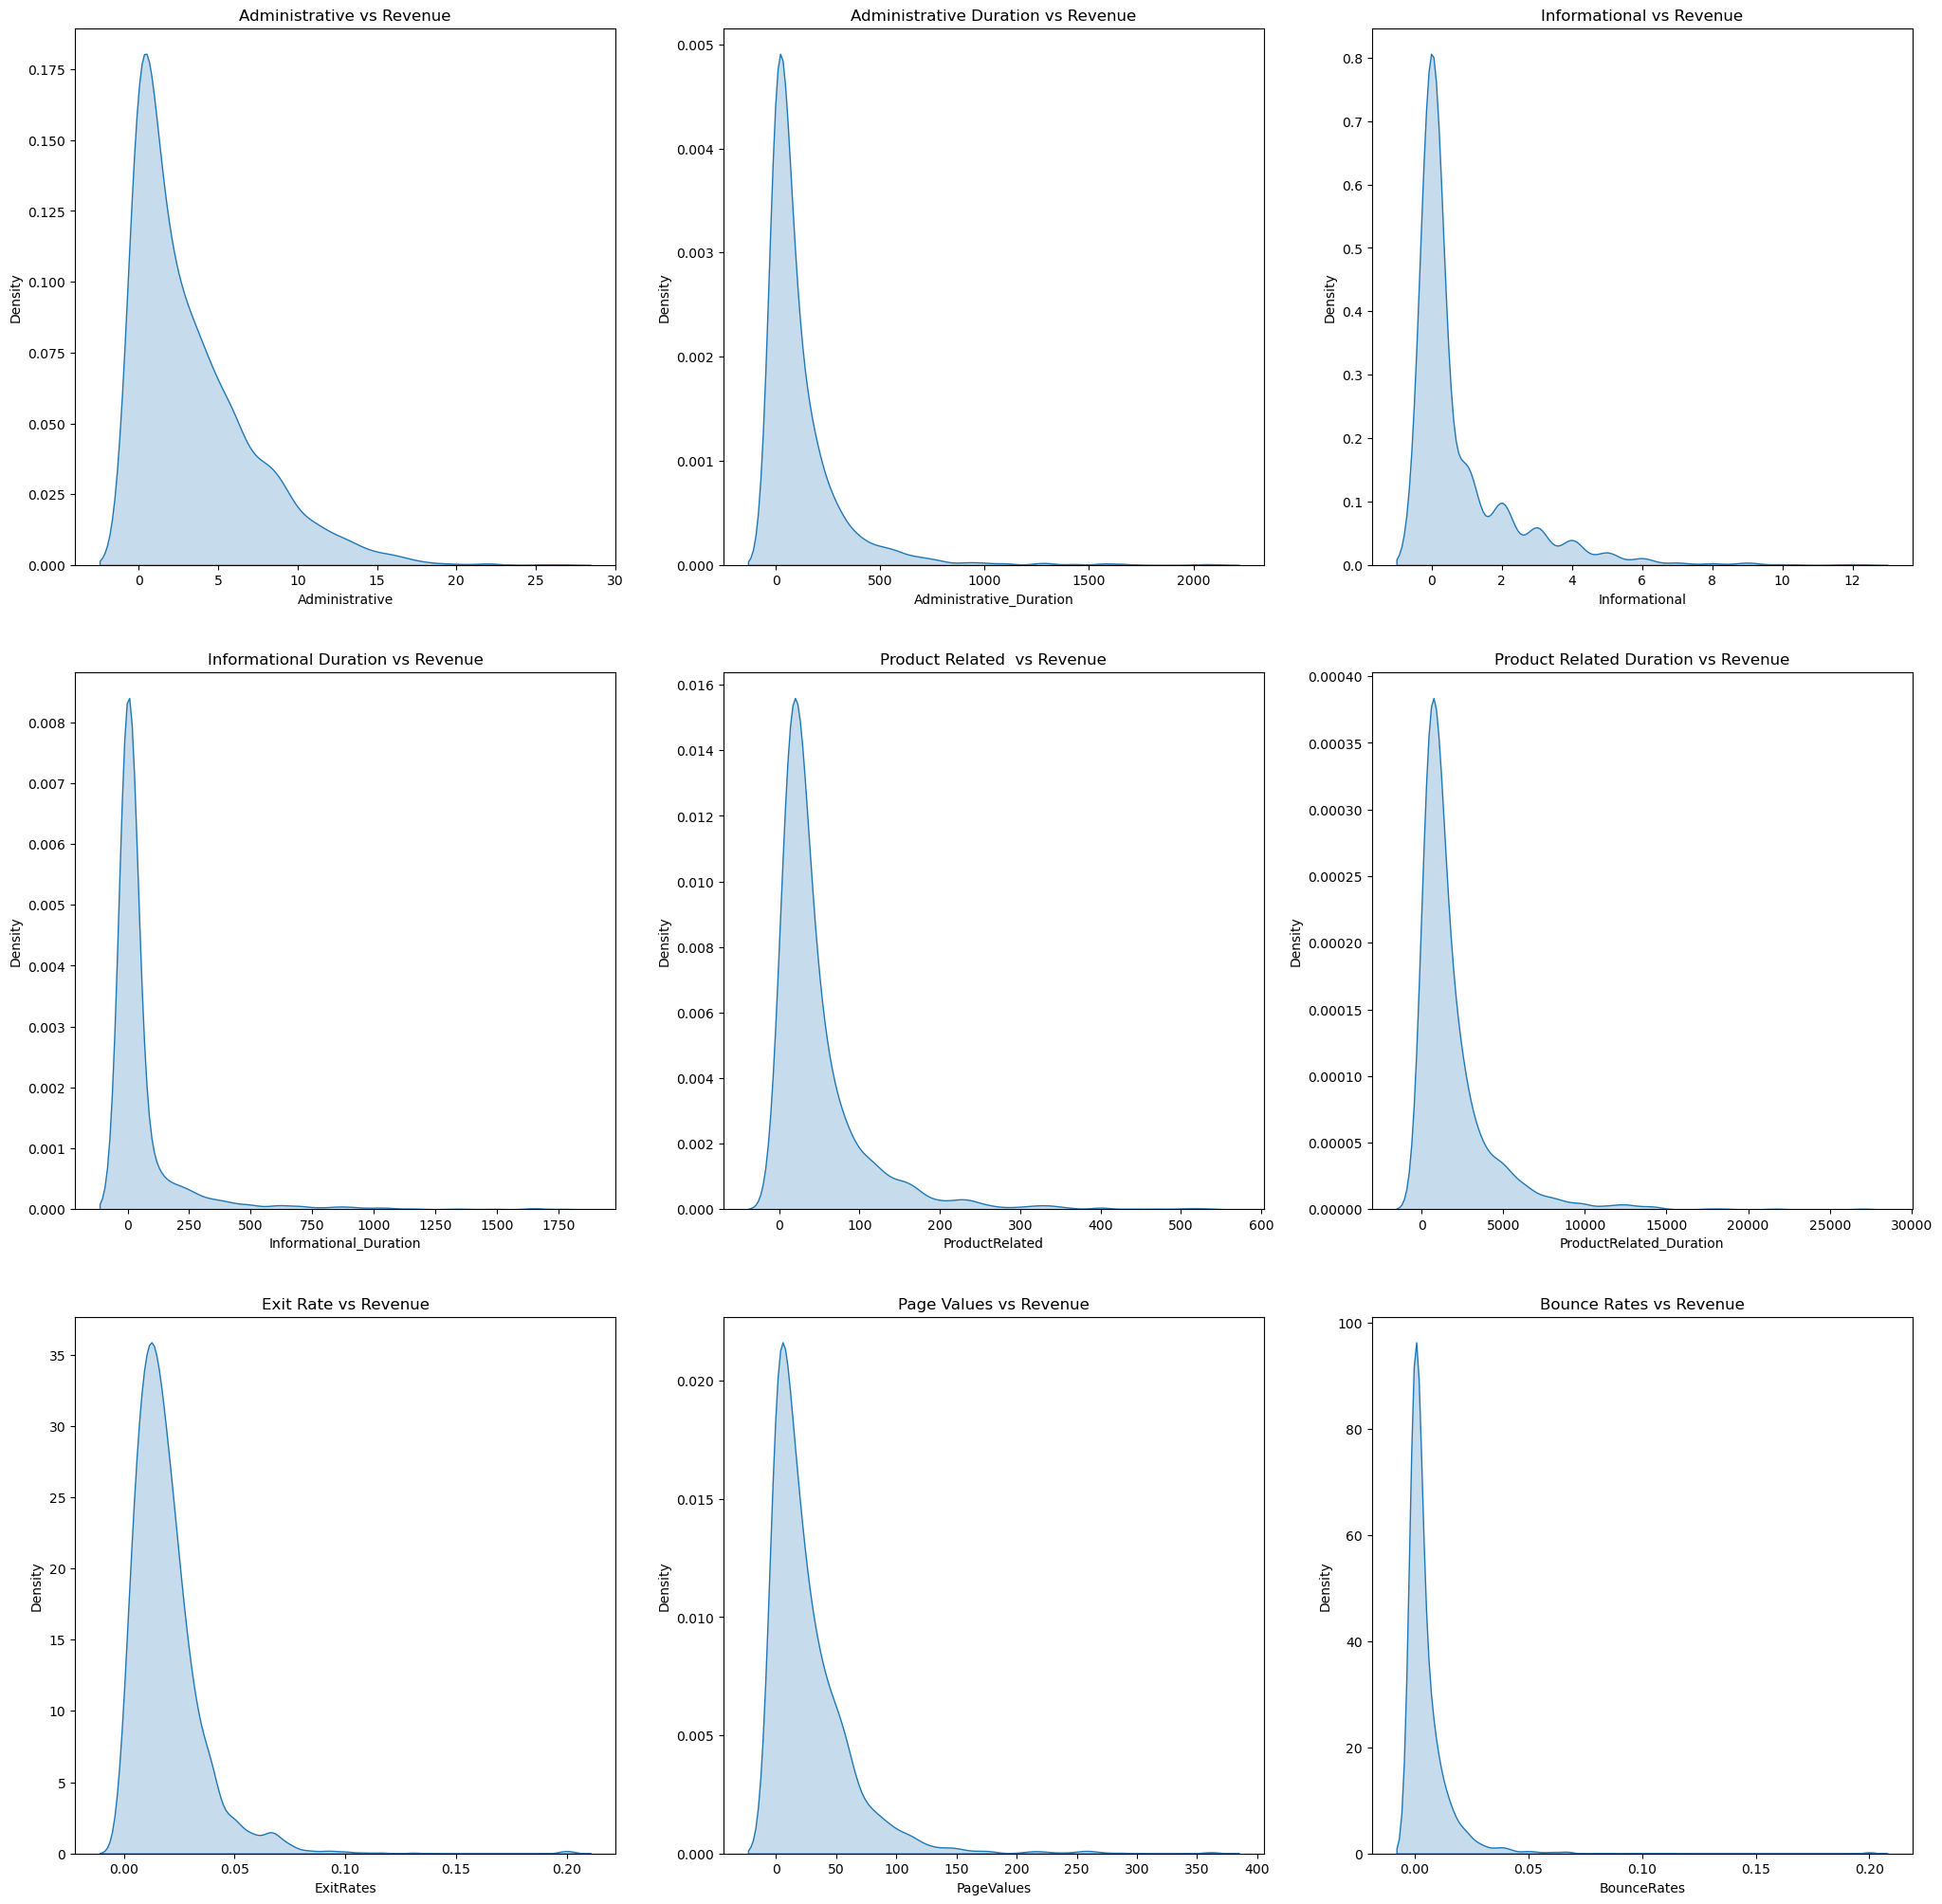

In [18]:
# KDE PLOT NUMERICAL FEATURES VS REVENUE

# Create subplots
fig, axs = plt.subplots(3, 3, figsize=(25, 25))

# Administrative vs Revenue
sns.kdeplot(data=df[df['Revenue'] == True]['Administrative'], shade=True, ax=axs[0,0])

# Administrative Duration vs Revenue
sns.kdeplot(data=df[df['Revenue'] == True]['Administrative_Duration'], shade=True, ax=axs[0,1])

# Informational vs Revenue
sns.kdeplot(data=df[df['Revenue'] == True]['Informational'], shade=True, ax=axs[0,2])

# Informational Duration vs Revenue
sns.kdeplot(data=df[df['Revenue'] == True]['Informational_Duration'], shade=True, ax=axs[1,0])

# Product Related vs Revenue
sns.kdeplot(data=df[df['Revenue'] == True]['ProductRelated'], shade=True, ax=axs[1,1])

# Product Related Duration vs Revenue
sns.kdeplot(data=df[df['Revenue'] == True]['ProductRelated_Duration'], shade=True, ax=axs[1,2])

# Bounce Rates vs Revenue
sns.kdeplot(data=df[df['Revenue'] == True]['BounceRates'], shade=True, ax=axs[2,2])

# Exit Rate vs Revenue
sns.kdeplot(data=df[df['Revenue'] == True]['ExitRates'], shade=True, ax=axs[2,0])

# Page Values vs Revenue
sns.kdeplot(data=df[df['Revenue'] == True]['PageValues'], shade=True, ax=axs[2,1])

# Set plot titles
axs[0,0].set_title('Administrative vs Revenue')
axs[0,1].set_title('Administrative Duration vs Revenue')
axs[0,2].set_title('Informational vs Revenue')
axs[1,0].set_title('Informational Duration vs Revenue')
axs[1,1].set_title('Product Related  vs Revenue')
axs[1,2].set_title('Product Related Duration vs Revenue')
axs[2,2].set_title('Bounce Rates vs Revenue')
axs[2,0].set_title('Exit Rate vs Revenue')
axs[2,1].set_title('Page Values vs Revenue')

# Show plot
plt.show()

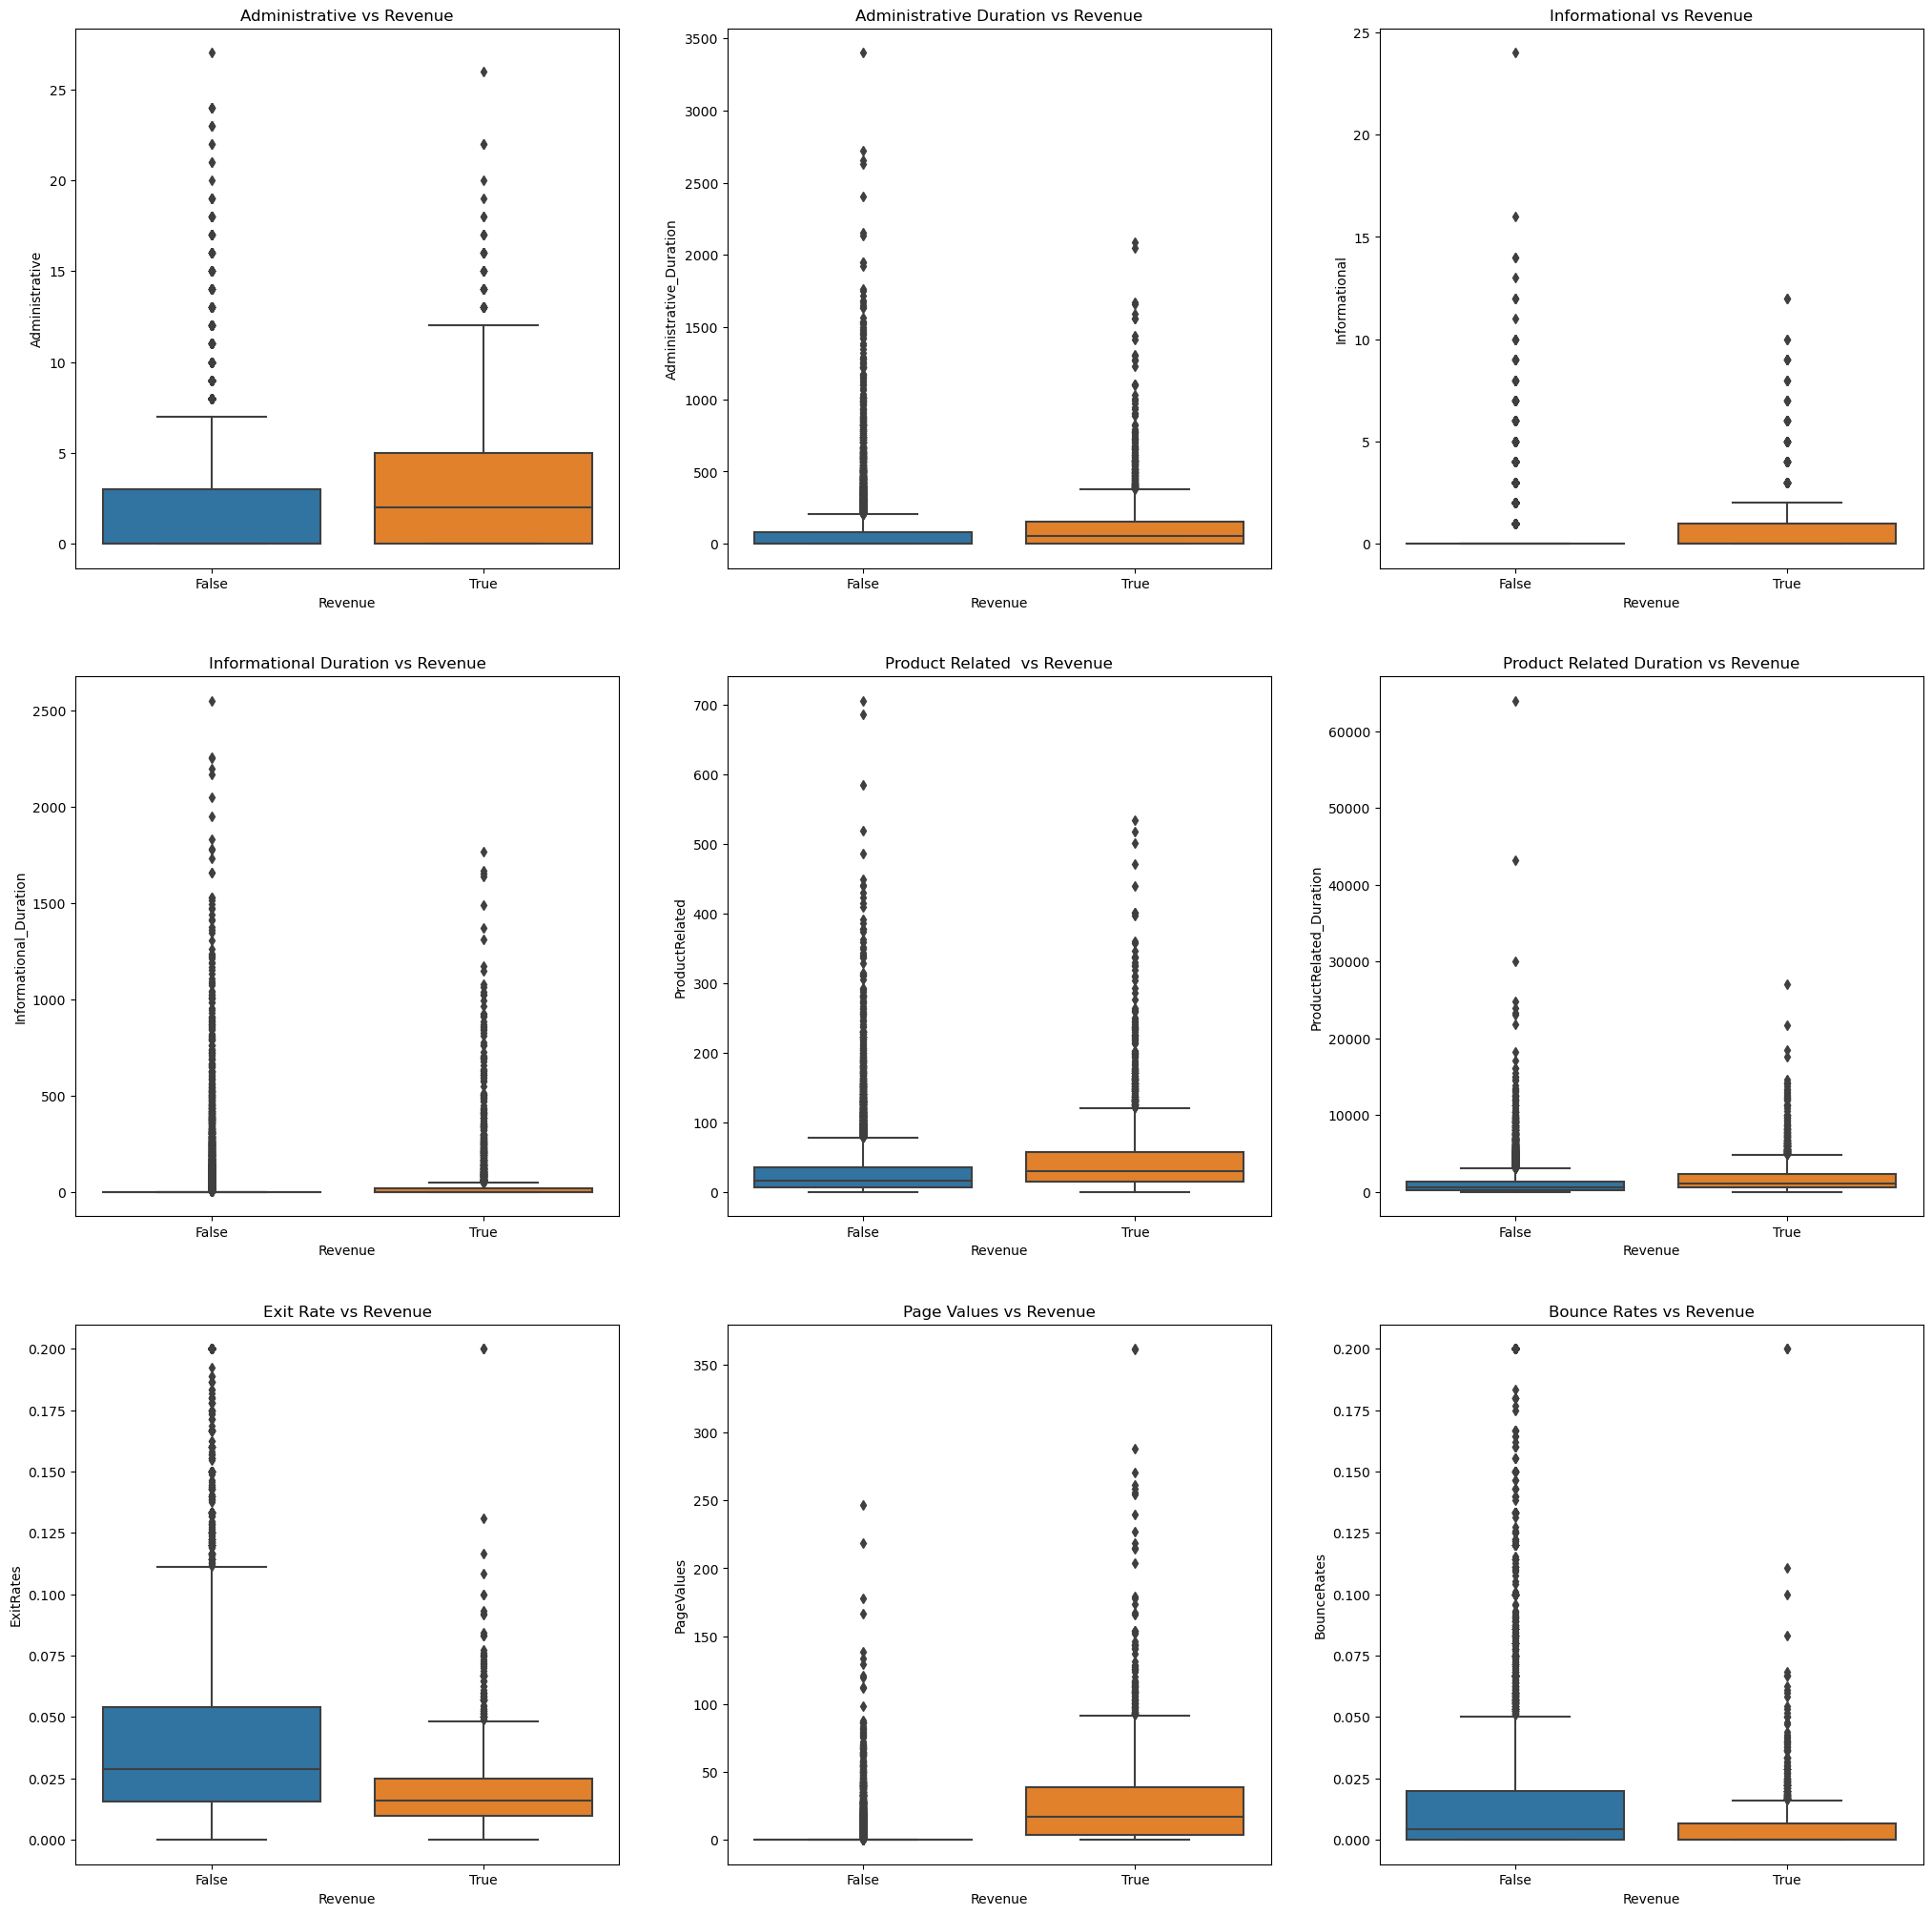

In [19]:
# BOX PLOT NUMERICAL FEATURES

# Create subplots
fig, axs = plt.subplots(3, 3, figsize=(25, 25))

# Administrative vs Revenue
sns.boxplot(x='Revenue', y='Administrative', data=df, ax=axs[0,0])

# Administrative Duration vs Revenue
sns.boxplot(x='Revenue', y='Administrative_Duration', data=df, ax=axs[0,1])

# Informational vs Revenue
sns.boxplot(x='Revenue', y='Informational', data=df, ax=axs[0,2])

# Informational Duration vs Revenue
sns.boxplot(x='Revenue', y='Informational_Duration', data=df, ax=axs[1,0])

# Product Related  vs Revenue
sns.boxplot(x='Revenue', y='ProductRelated', data=df, ax=axs[1,1])

# Product Related Duration vs Revenue
sns.boxplot(x='Revenue', y='ProductRelated_Duration', data=df, ax=axs[1,2])

# Bounce Rates vs Revenue
sns.boxplot(x='Revenue', y='BounceRates', data=df, ax=axs[2,2])

# Exit Rate vs Revenue
sns.boxplot(x='Revenue', y='ExitRates', data=df, ax=axs[2,0])

# Page Values vs Revenue
sns.boxplot(x='Revenue', y='PageValues', data=df, ax=axs[2,1])

# Set plot titles
axs[0,0].set_title('Administrative vs Revenue')
axs[0,1].set_title('Administrative Duration vs Revenue')
axs[0,2].set_title('Informational vs Revenue')
axs[1,0].set_title('Informational Duration vs Revenue')
axs[1,1].set_title('Product Related  vs Revenue')
axs[1,2].set_title('Product Related Duration vs Revenue')
axs[2,2].set_title('Bounce Rates vs Revenue')
axs[2,0].set_title('Exit Rate vs Revenue')
axs[2,1].set_title('Page Values vs Revenue')

# Show plot
plt.show()

**Interpretasi Bivariate Plot untuk Numerical Features vs Revenue**
- Pada Administrative dan Administrative_Duration menunujukkan bahwa setiap kali pengunjung yang mengunjungi halaman bukan berarti mereka membeli.
- Pada Informasi dan Information_Duration menunjukkan bahwa orang menghabiskan waktu membaca halaman informasi untuk memutuskan membeli sesuatu atau tidak. Dan kebanykan pengunjung hanya berkunjung dan tidak membeli.
-ProductRelated dan ProductRelated_Duration menunjukkan banyak pengunjung mengunjungi halaman terkait produk dan menghabiskan waktu disana dengan jumlah paling banyak mengunjungi halaman terkait sebesar 0-400. 
-Tingginya angka BouncesRates dan ExitRates menunjukkan bahwa kedua fitur tersebut tidak menghasilkan revenue


#### **Categorical Features vs Revenue**

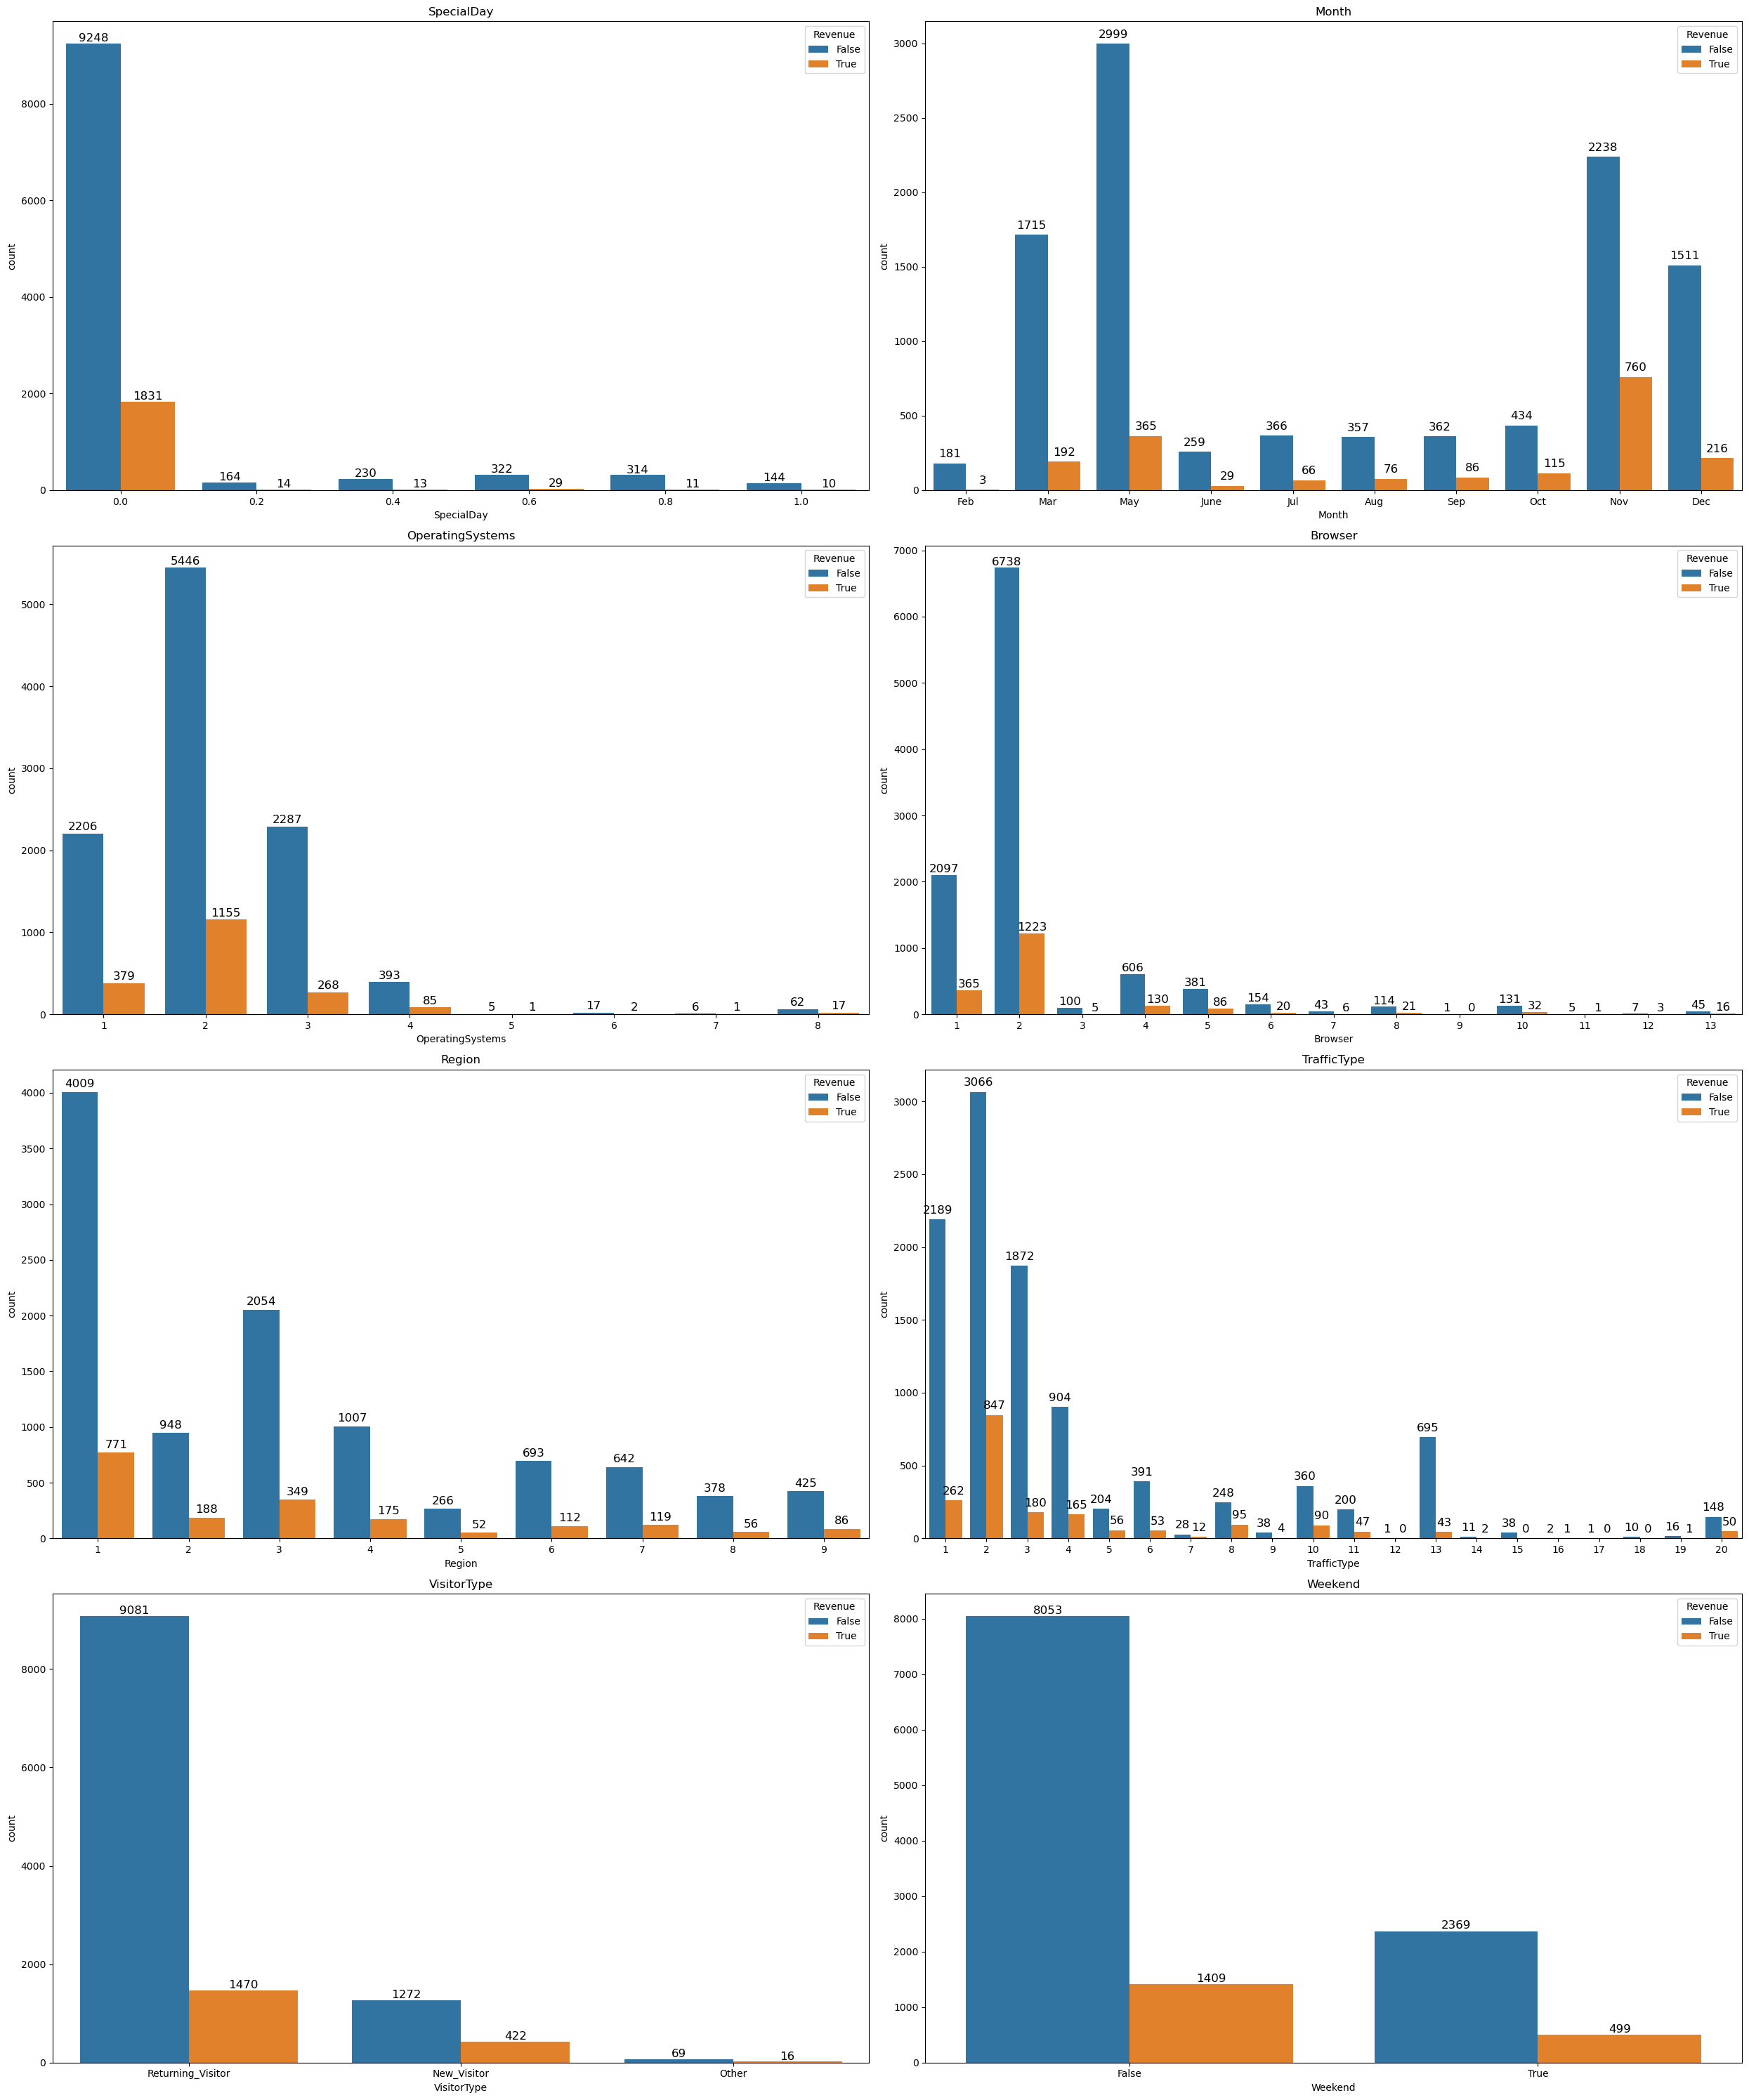

In [20]:
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(25, 30))
for i, var in enumerate(nominal[:-1]):
    row = i // 2
    col = i % 2
    sns.countplot(data=df, x=var, hue='Revenue', ax=ax[row, col])
    ax[row, col].set_title(var)
    ax[row, col].legend(title='Revenue', loc='upper right')
    
    # Add labels on top of bars
    totals = float(len(df[var]))
    for patch in ax[row, col].patches:
        height = patch.get_height()
        ax[row, col].text(patch.get_x()+patch.get_width()/2., height+40, '{:.0f}'.format(height), ha="center", fontsize=12)
    
plt.tight_layout()
plt.show()


In [21]:
#persentase tiap nominal kategori
for col in nominal:
    print("Persentase Pengungjung Pada Feature",col,":")
    print((df.groupby(col)['Revenue'].value_counts(normalize=True)*100).round(2))
    print("\n")

Persentase Pengungjung Pada Feature SpecialDay :
SpecialDay  Revenue
0.0         False      83.47
            True       16.53
0.2         False      92.13
            True        7.87
0.4         False      94.65
            True        5.35
0.6         False      91.74
            True        8.26
0.8         False      96.62
            True        3.38
1.0         False      93.51
            True        6.49
Name: Revenue, dtype: float64


Persentase Pengungjung Pada Feature Month :
Month  Revenue
Feb    False      98.37
       True        1.63
Mar    False      89.93
       True       10.07
May    False      89.15
       True       10.85
June   False      89.93
       True       10.07
Jul    False      84.72
       True       15.28
Aug    False      82.45
       True       17.55
Sep    False      80.80
       True       19.20
Oct    False      79.05
       True       20.95
Nov    False      74.65
       True       25.35
Dec    False      87.49
       True       12.51
Name: Revenu

**Interpretasi Bivariate Countplot untuk Categorical Features vs Revenue**
- Persentase pengunjung pada feature Special day yang banyak melakukan transaksi (Revenue) pada 0.0 sebanyak 16.53% sedangkan pada 1.0 ada 6.49% banyak pengunjung yang melakukan transaksi. Dapat dilihat dari persentase diatas daya minat beli user lebih condong sebelum Special day.
- Jumlah user yang paling banyak melakukan transaksi pada bulan November sebesar 25.35%, bulan Oktober 20.95%, dan bulan September 19.20%. Namun pada bulan Mei paling banyak pengunjung yang tidak melakukan transaksi.
- Pada feature OperatyngSistem jumlah pengunjung yang banyak melakukan transaksi pada OS 4 sebesar 17.78% dan pada OS 2 sebesar 17.50%.
- Jumlah user yang paling banyak melakukan transaksi terdapat pada browser 12 sebesar 30.00% dan browser 13 sebesar 26.23%.
- Jumlah user terbanyak melakukan transaksi terdapat pada region 9 sebesar 16.83%, region 2 sebesar 16.55%, dan region 5 sebesar 16.35%.
- TrafficType 7 terdapat 30.00% pengunjung yang banyak melakukan transaksi dan traffictype 8 sebesar 27.70%.
- Banyak new visitor yang melakukan transaksi sebesar 24.91%
- Jumlah pengunjung yang melakukan transaksi pada weekend sebesar 17.40%



#### **Correlation - Multivariate Analysis**

In [22]:
# Memisahkan target variabel dari fitur
X = df.drop('Revenue', axis=1)
y = df['Revenue']

# Membagi data menjadi data pelatihan dan data pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menampilkan ukuran data pelatihan dan pengujian
print("Jumlah baris dan kolom data pelatihan:", X_train.shape)
print("Jumlah baris dan kolom data pengujian:", X_test.shape)

Jumlah baris dan kolom data pelatihan: (9864, 17)
Jumlah baris dan kolom data pengujian: (2466, 17)


In [23]:
df['Total_visit_duration'] = df['Administrative_Duration'] + df['Informational_Duration'] + df['ProductRelated_Duration']
df['Total_visit_duration'].dtype

dtype('float64')

In [24]:
df['Total_pageviews'] = df['Administrative'] + df['Informational'] + df['ProductRelated']
df['Total_pageviews'].dtype

dtype('int64')

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12330 entries, 0 to 9017
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Administrative           12330 non-null  int64   
 1   Administrative_Duration  12330 non-null  float64 
 2   Informational            12330 non-null  int64   
 3   Informational_Duration   12330 non-null  float64 
 4   ProductRelated           12330 non-null  int64   
 5   ProductRelated_Duration  12330 non-null  float64 
 6   BounceRates              12330 non-null  float64 
 7   ExitRates                12330 non-null  float64 
 8   PageValues               12330 non-null  float64 
 9   SpecialDay               12330 non-null  float64 
 10  Month                    12330 non-null  category
 11  OperatingSystems         12330 non-null  int64   
 12  Browser                  12330 non-null  int64   
 13  Region                   12330 non-null  int64   
 14  Traffic

Feature Administrative: 242.546110
Feature Administrative_Duration: 108.855162
Feature Informational: 112.904281
Feature Informational_Duration: 61.285363
Feature ProductRelated: 320.445087
Feature ProductRelated_Duration: 294.465565
Feature BounceRates: 286.217615
Feature ExitRates: 552.163750
Feature PageValues: 3948.396128
Feature SpecialDay: 309.110201
Feature OperatingSystems: 343.817196


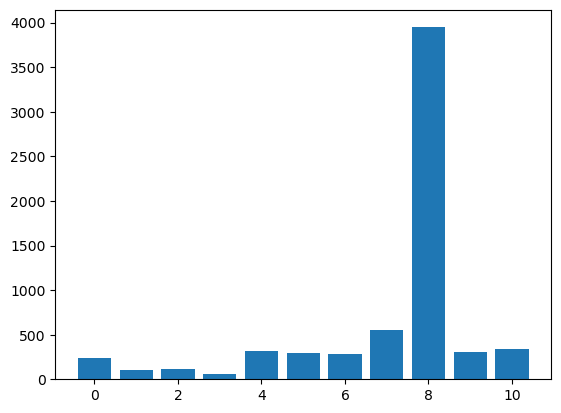

In [44]:
# TES KORELASI NUMERICAL FEATURES DENGAN TARGET FEATURE (REVENUE) MENGGUNAKAN ANOVA

# split into input (X) and output (y) variables
X = df[['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration','ProductRelated','ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues','Total_visit_duration','Total_pageviews']].values
# target variable
y = df['Revenue'].values


# feature selection
def select_features(X_train, y_train, X_test, feature_names):
    # configure to select all features
    fs = SelectKBest(score_func=f_classif, k='all')
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)

    # print feature scores
    for i in range(len(fs.scores_)):
        print('Feature %s: %f' % (feature_names[i], fs.scores_[i]))

    return X_train_fs, X_test_fs, fs

# get feature names
feature_names = df.select_dtypes(include='number').columns.tolist()
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=2, random_state=42)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test, feature_names)
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

Berdasarkan Tes Korelasi  Numerical Features terhadap Target dengan tes ANOVA, Feature Page Value terlihat berkorelasi kuat dengan Revenue. Feature Exit Rates dan Product Related juga dapat dikatakan cukup berkorelasi dengan Revenue, disusul dengan Product Related Duration dan Bounce Rates.
<p>Exit Rates dengan Bounce Rates dan Product Related dan Product Related Duration memiliki korelasi yang bersifat redundan atau multicollinearity, sehingga kita memilih Exit Rates dan Product Related untuk diketahui lebih lanjut.

In [26]:
# define the evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
# define the pipeline to evaluate
model = LogisticRegression(solver='liblinear')
fs = SelectKBest(score_func=f_classif)
pipeline = Pipeline(steps=[('anova',fs), ('lr', model)])
# define the grid
grid = dict()
grid['anova__k'] = [i+1 for i in range(X.shape[1])]
# define the grid search
search = GridSearchCV(pipeline, grid, scoring='accuracy', n_jobs=-1, cv=cv)
# perform the search
results = search.fit(X, y)
# summarize best
print('Best Mean Accuracy: %.3f' % results.best_score_)
print('Best Config: %s' % results.best_params_)

Best Mean Accuracy: 0.883
Best Config: {'anova__k': 2}


>1 0.883 (0.006)
>2 0.883 (0.007)
>3 0.882 (0.006)
>4 0.882 (0.006)
>5 0.881 (0.007)
>6 0.881 (0.006)
>7 0.881 (0.006)
>8 0.881 (0.006)
>9 0.881 (0.006)
>10 0.881 (0.006)
>11 0.881 (0.006)


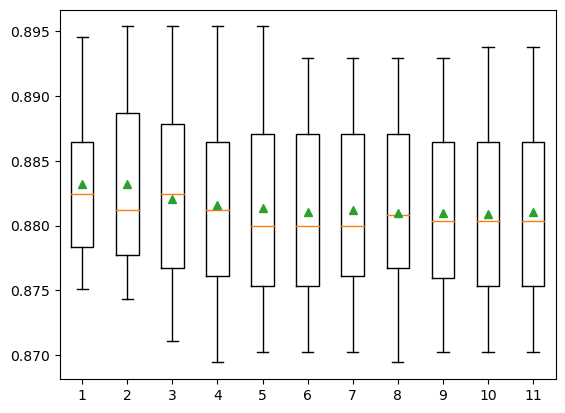

In [27]:
# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
 cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
 scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
 return scores
 
# define number of features to evaluate
num_features = [i+1 for i in range(X.shape[1])]
# enumerate each number of features
results = list()
for k in num_features:
 # create pipeline
 model = LogisticRegression(solver='liblinear')
 fs = SelectKBest(score_func=f_classif, k=k)
 pipeline = Pipeline(steps=[('anova',fs), ('lr', model)])
 # evaluate the model
 scores = evaluate_model(pipeline, X, y)
 results.append(scores)
 # summarize the results
 print('>%d %.3f (%.3f)' % (k, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=num_features, showmeans=True)
pyplot.show()


Feature SpecialDay: 269.089947
Feature Month: 86.221173
Feature OperatingSystems: 1.962391
Feature Browser: 0.691710
Feature Region: 4.455475
Feature TrafficType: 172.424443
Feature VisitorType: 37.529341
Feature Weekend: 8.146599


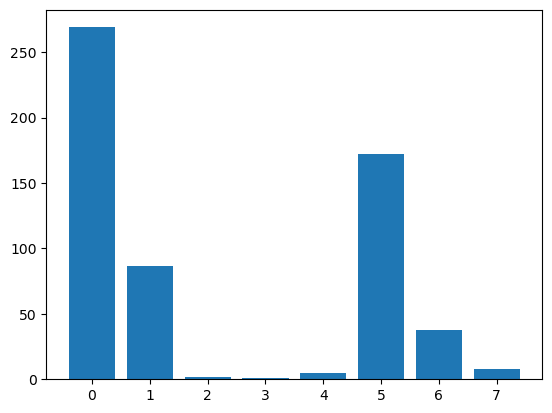

In [28]:
# split into input (X) and output (y) variables
X = df[['SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend']].values
y = df['Revenue'].values

# format all fields as string
X = X.astype(str)

# prepare train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=2, random_state=42)

# prepare input data
oe = OrdinalEncoder()
oe.fit(X_train)
X_train_enc = oe.transform(X_train)
X_test_enc = oe.transform(X_test)

# prepare output data
le = LabelEncoder()
le.fit(y_train)
y_train_enc = le.transform(y_train)
y_test_enc = le.transform(y_test)

# feature selection
fs = SelectKBest(score_func=chi2, k='all')
fs.fit(X_train_enc, y_train_enc)
X_train_fs = fs.transform(X_train_enc)
X_test_fs = fs.transform(X_test_enc)

# get feature names
feature_names = ['SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend']

# print feature names and their scores
for i in range(len(fs.scores_)):
    print('Feature %s: %f' % (feature_names[i], fs.scores_[i]))

# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

Berdasarkan Tes Korelasi Categorical Features terhadap Target dengan tes Chi Square, Feature Special Day terlihat berkorelasi kuat dengan Revenue. Feature Traffic Type dan Month juga dapat dikatakan cukup berkorelasi baik dengan Revenue.
<p>Korelasi kuat antara Special Day dan Revenue dapat diasumsikan jika mendekati Special Day, user akan melakukan transaksi karena banyak promo atau ingin memberikan hadiah ke orang lain.


## **Business Insight & Recommendation** 


- Jumlah revenue atau pendapatan yang didapat dari pelanggan lama atau yang kembali lebih banyak daripada pelanggan baru. Namun, tingkat konversi pelanggan baru lebih tinggi dibandingkan dengan pelanggan lama. Dari total pengujung sebanyak 85% merupakan pengunjung kembali ke situs dan 15% pengunjung adalah baru. Kita dapat memberikan tawaran atau campaign untuk menarik lebih banyak pengunjung baru agar tertarik melakukan pembelian pada situs web dan membuat pelanggan lama untuk melakukan transaksi kembali di situs web.
- Sebanyak 65% pengunjung berasal dari browser 2 dan lebih dari 85% pengunjung berasal dari browser 1 dan 2. Kita dapat membuat situs web menjadi lebih menarik, interaktif, dan responsif terhadap browser ini. Selain itu, untuk meningkatkan konversi pada browser lainnya, kita dapat memasang iklan situs web pada browser lainnya.
- Wilayah 1 menyumbang penjualan lebih banyak diikuti oleh wilayah 3. Dengan informasi ini, dapat direncanakan campaign dan penyediaan pasokan barang dengan cara yang lebih baik. Sebagai contoh, kita mungkin mengusulkan untuk membangun gudang yang khusus melayani kebutuhan wilayah 1 untuk meningkatkan tingkat pengiriman dan memastikan bahwa produk dengan permintaan tertinggi selalu tersedia dengan baik.
- Pengunjung situs web tertinggi di bulan Mei, tetapi jumlah pembelian atau transaksi paling besar terjadi di bulan November. Hal ini perlu diselidiki lebih lanjut oleh tim bisnis untuk mengetahui apa yang menyebabkan atau faktor yang mempengaruhi tingginya transaksi pada bulan november
-  Sekitar 95% pengunjung menggunakan operating system (OS) 1, 2, atau 3. Dengan mengetahui OS apa saja yang sering digunakan pelanggan untuk melakukan transaksi, bisa menjadi bahan pertimbangan jika kita ingin membuat aplikasi belanja yang user friendly. Dengan adanya aplikasi yang tersedia di aplikasi store di masing-masing OS dapat lebih memudahkan customer melakukan pencarian atau pembelian, serta memudahkan kita memberikan promosi dengan membuat notifikasi aplikasi.
- Rata-rata pengeluaran pada halaman administratif, informasi, dan produk terkait lebih tinggi bagi mereka yang membeli sesuatu daripada mereka yang tidak membeli apa-apa.
- Rata-rata Bounce Rate dan Exit Rate lebih rendah saat ada penjualan produk.
- Halaman-halaman dengan nilai halaman tinggi memiliki bounce rate yang lebih rendah. Kita harus berbicara dengan tim teknologi kami untuk menemukan cara meningkatkan nilai halaman dari halaman web.
- Konversi pengunjung pada hari weekdays lebih banyak yang tidak melakukan transaksi dibandingkan dengan hari weekend, namun jumlah pengunjung pada hari weekend masih terlalu rendah. Solusi yang akan kami lakukan adalah memprioritaskan pada hari weekend yang memiliki potensi konversi lebih tinggi dari hari weekdays dengan memberikan rekomendasi promosi diskon produk di hari weekend



------------------------------------------------------------------------------------------------------------------------------------------------------

# Preprocessing Data

In [29]:
df_copy = df.copy()

# Missing Data

In [30]:
df_copy.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
Total_visit_duration       0
Total_pageviews            0
dtype: int64

--------------------------------------------------------------------------

Tidak terdapat data yang hilang

# Duplicated Data

In [31]:
 df_copy.duplicated().sum()

125

In [32]:
df_copy = df_copy.drop_duplicates()

In [33]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,12330.0,2.315166,3.321784,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12330.0,80.818611,176.779107,0.0,0.000000,7.500000,93.256250,3398.750000
Informational,12330.0,0.503569,1.270156,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12330.0,34.472398,140.749294,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12330.0,31.731468,44.475503,0.0,7.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12330.0,1194.746220,1913.669288,0.0,184.137500,598.936905,1464.157214,63973.522230
BounceRates,12330.0,0.022191,0.048488,0.0,0.000000,0.003112,0.016813,0.200000
ExitRates,12330.0,0.043073,0.048597,0.0,0.014286,0.025156,0.050000,0.200000
PageValues,12330.0,5.889258,18.568437,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12330.0,0.061427,0.198917,0.0,0.000000,0.000000,0.000000,1.000000


# Feature Encoding

In [34]:
X = df_copy.drop(['Revenue'], axis=1) # Features
y = df_copy['Revenue'] # Label

X.shape, y.shape

((12205, 19), (12205,))

In [35]:
# One-hot encoding pada kolom Month, VisitorType, dan Weekend
df_copy = pd.get_dummies(df_copy, columns=['Month', 'VisitorType', 'Weekend'])

# Label encoding pada kolom Revenue
le = LabelEncoder()
df_copy['Revenue'] = le.fit_transform(df_copy['Revenue'])

# Menampilkan hasil encoding
print(df_copy.head())
print(df_copy['Revenue'].unique())

     Administrative  Administrative_Duration  Informational  \
0                 0                      0.0              0   
117               0                      0.0              0   
118               0                      0.0              0   
119               0                      0.0              0   
120               0                      0.0              0   

     Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                       0.0               1                      0.0   
117                     0.0              11                    577.0   
118                     0.0               8                     95.0   
119                     0.0               6                    301.5   
120                     0.0               6                    243.0   

     BounceRates  ExitRates  PageValues  SpecialDay  ...  Month_Aug  \
0       0.200000   0.200000         0.0         0.0  ...          0   
117     0.018182   0.027273         0.0       

# Handling Outlier

In [36]:
# Hitung nilai Q1, Q3, dan IQR dari data train
Q1_train = df_copy.quantile(0.02)
Q3_train = df_copy.quantile(0.98)
IQR_train = Q3_train - Q1_train

# Lakukan feature scaling pada data train menggunakan nilai Q1, Q3, dan IQR dari data train
df_copy = (df_copy - Q1_train) / IQR_train

# Feature Transformation

In [37]:
# Inisialisasi objek StandardScaler dan terapkan pada numerical_data

# melakukan scaling pada data continuous
continuous_cols = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration','ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues']
# Membuat objek PowerTransformer
pt = PowerTransformer(method='yeo-johnson')

#Transformasi kolom-kolom dalam daftar continuous_cols
df_copy[continuous_cols] = pt.fit_transform(df_copy[continuous_cols])
#df_copy[continuous_cols] = np.sqrt(df_copy[continuous_cols])
#df_copy[continuous_cols] = np.log(df_copy[continuous_cols])
#df_copy[continuous_cols] = np.reciprocal(df_copy[continuous_cols])

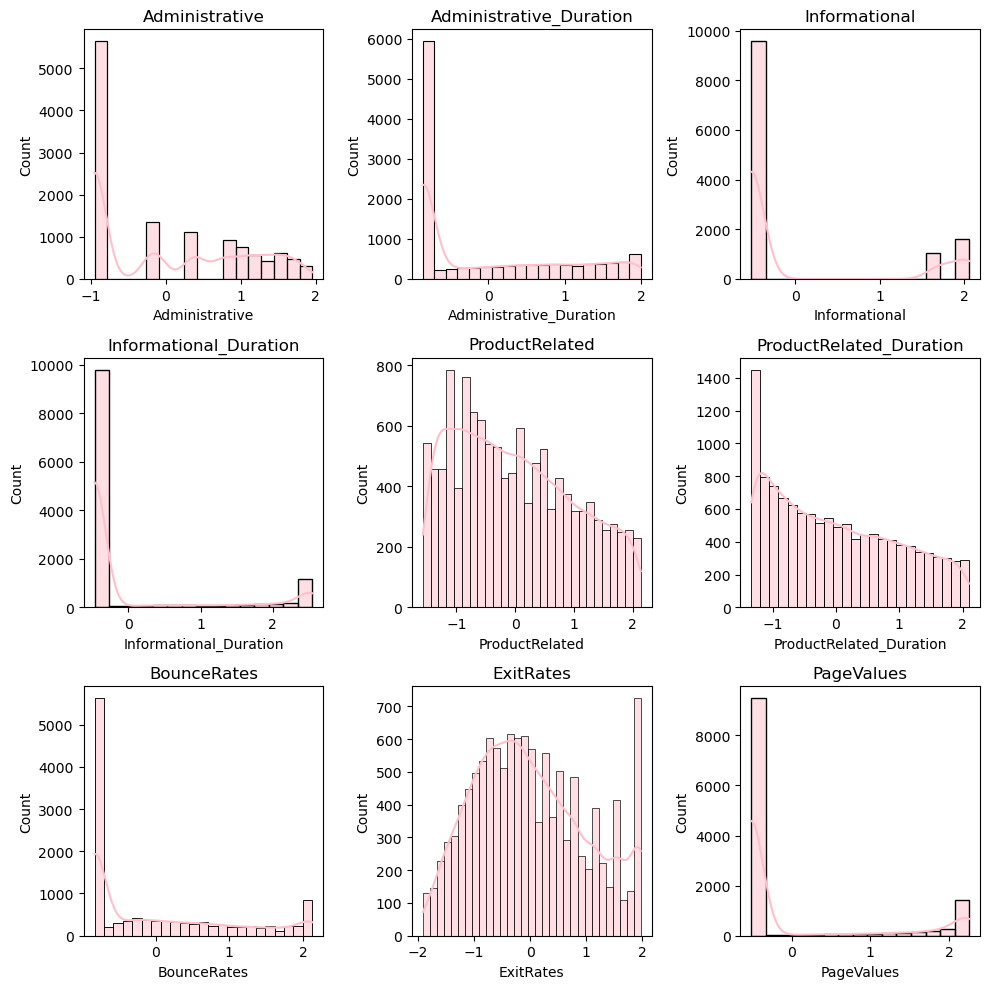

In [38]:
# Membuat ukuran plot
plt.figure(figsize=(10,10))

# Iterasi pada setiap kolom dalam daftar continuous_cols
for i, col in enumerate(continuous_cols):
    plt.subplot(3, 3, i+1)
    sns.histplot(df_copy[col], kde=True, color='pink')
    plt.title(col)

# Menampilkan plot
plt.tight_layout()
plt.show()

# Feature Scaling

In [39]:
# Membuat objek StandardScaler
scaler = StandardScaler()

# Scaling kolom-kolom dalam daftar continuous_cols
df_copy[continuous_cols] = scaler.fit_transform(df_copy[continuous_cols])


In [40]:
df_copy.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Aug,Month_Sep,Month_Oct,Month_Nov,Month_Dec,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_False,Weekend_True
0,-0.947119,-0.855874,-0.522873,-0.46295,-1.462802,-1.338357,2.126510,1.978410,-0.511263,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,1.0,0.0
117,-0.947119,-0.855874,-0.522873,-0.46295,-0.587900,-0.201348,0.795557,-0.029427,-0.511263,0.25,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,1.0,0.0
118,-0.947119,-0.855874,-0.522873,-0.46295,-0.820141,-1.111016,-0.828017,1.274772,-0.511263,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,1.0,0.0
119,-0.947119,-0.855874,-0.522873,-0.46295,-0.988404,-0.676263,-0.828017,1.655229,-0.511263,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,1.0,0.0
120,-0.947119,-0.855874,-0.522873,-0.46295,-0.988404,-0.791812,-0.828017,0.231406,-0.511263,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,1.0,0.0


In [41]:
df_copy.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Aug,Month_Sep,Month_Oct,Month_Nov,Month_Dec,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_False,Weekend_True
count,1.220500e+04,12205.000000,1.220500e+04,1.220500e+04,1.220500e+04,1.220500e+04,1.220500e+04,1.220500e+04,1.220500e+04,12205.000000,...,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,81.0,12205.000000,12205.000000,12205.000000
mean,-4.657388e-17,0.000000,-7.451821e-17,-4.657388e-18,-1.862955e-17,2.794433e-17,2.794433e-17,9.314776e-18,1.862955e-17,0.077427,...,0.035477,0.036706,0.044982,0.244326,0.139779,0.138714,inf,0.854650,0.765752,0.234248
std,1.000041e+00,1.000041,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,0.249583,...,0.184990,0.188047,0.207272,0.429705,0.346772,0.345662,NaN,0.352468,0.423545,0.423545
min,-9.471192e-01,-0.855874,-5.228727e-01,-4.629500e-01,-1.567931e+00,-1.338357e+00,-8.280172e-01,-1.916823e+00,-5.112628e-01,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,inf,0.000000,0.000000,0.000000
25%,-9.471192e-01,-0.855874,-5.228727e-01,-4.629500e-01,-8.201410e-01,-8.951875e-01,-8.280172e-01,-7.554164e-01,-5.112628e-01,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,1.000000,0.000000
50%,-1.572079e-01,-0.594687,-5.228727e-01,-4.629500e-01,-1.267388e-01,-1.528567e-01,-4.632780e-01,-1.383689e-01,-5.112628e-01,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,1.000000,0.000000
75%,1.035462e+00,0.887190,-5.228727e-01,-4.629500e-01,7.532969e-01,7.951833e-01,7.076810e-01,7.341768e-01,-5.112628e-01,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,1.000000,0.000000
max,1.953861e+00,1.992986,2.059288e+00,2.545468e+00,2.137201e+00,2.103348e+00,2.126510e+00,1.978410e+00,2.253004e+00,1.250000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,inf,1.000000,1.000000,1.000000


# Class Imbalance

In [46]:
from imblearn.over_sampling import SMOTE

# Separate features and target
X = df_copy.iloc[:,:-1]
y = df_copy.iloc[:, -1]

# Apply SMOTE to training data
oversample = SMOTE()
X_train_resampled, y_train_resampled = oversample.fit_resample(X_train, y_train)


### B. Feature Extraction 
Membuat feature baru dari feature yang sudah ada

- Total_visit_duration = Administrative_Duration + Informational_Duration + ProductRelated_Duration
- Session_duration = selisih waktu ExitRates dengan BounceRates
- Total_pageviews = Administrative + Informational + ProductRelated
- Average_duration_per_pages = Total_visit_duration / Total_pageviews
- Ratio_ExitRates dan Ratio_BounceRates

### C. Feature Tambahan (selain yang sudah tersedia di dataset) 
Untuk membantu membuat performansi model yang akan datang semakin bagus

- UserID / Invoice sebagai identifier untuk mencegah data duplikat
- Date-time untuk mengoptimalkan waktu yang tepat untuk campaign notification
- Gender untuk mengoptimalkan halaman rekomendasi
- Tanggal lahir (DDMMYYYY)
- Tanggal registrasi / tanggal checkout